# Detection Algorithm Results
Read and analyze the results from running the detection algorithm on all APF data, which has already been deblazed, normalized, and velocity shifted by Anna Zuckerman using specmatch-emp.

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os, glob #glob.glob(DIR_NAME + '/*fits')
from astropy.io import fits

## Read in Reduced Data from Anna Zuckerman's repo
Read in all the spectra that was fed into the detection algorithm.

In [344]:
directory = '/mnt_home/azuckerman/APF_spectra/NDR_corrected_wl_scale'

# every file in Anna's NDR_corrected_wl_scale folder
list_of_files = []
for filename in os.listdir(directory):
    if filename.endswith(".fits"): 
        file_path = os.path.join(directory, filename)
        list_of_files = np.append(list_of_files, file_path)

## Look at total detections tables
The spectra were divided into six bins to speed up the runtime of the detection algorithm. Combine all the individual tables into one table with all the results.

In [348]:
results1000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/MyStuff/Results/LaserDetectionResults1000/results.csv', index_col = 'index')
results3000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/MyStuff/Results/LaserDetectionResults3000/results.csv', index_col = 'index')
results4000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/MyStuff/Results/LaserDetectionResults4000/results.csv', index_col = 'index')
results5000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/MyStuff/Results/LaserDetectionResults5000/results.csv', index_col = 'index')
results6000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/MyStuff/Results/LaserDetectionResults6000/results.csv', index_col = 'index')

results2000 = pd.read_csv('/mnt_home/zoek/code/APF-BL-DAP/Zoe/MyStuff/Results/LaserDetectionResults2000/results.csv', index_col = 'index')


results1000 = results1000.drop(columns = 'Unnamed: 0')
results2000 = results2000.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
results3000 = results3000.drop(columns = 'Unnamed: 0')
results4000 = results4000.drop(columns = 'Unnamed: 0')
results5000 = results5000.drop(columns = 'Unnamed: 0')
results6000 = results6000.drop(columns = 'Unnamed: 0')

In [349]:
total_results = results1000.append([results2000, results3000, results4000, results5000, results6000])

In [350]:
total_results
# all 5866 of the spectra - excludes spectra 1760 and 1762 because these had very 
# low S/N and therefore very long runtimes

,star,ndetections
index,,
0,HIP12444,0
1,HIP19855,2
2,HIP12444,2
3,HIP12444,2
4,HIP42172,2
...,...,...
5863,HD172167,1
5864,Vega,0
5865,HD187642,4


## Add SNR data to table
Use SNR.ipynb to calculate the S/N ratios for all the spectra.

In [351]:
SNR = [150.14957863943917, 162.8872288295201, 142.6372259230841, 120.84048679896763, 111.7940179734003, 137.16839744931175, 139.78279004778182, 143.3696772257487, 116.02155122302827, 148.34239632742745, 129.9794867379325, 77.32215263730004, 76.06609035673596, 90.4553455171131, 12.192421731494722, 140.53904142833892, 139.19363984607514, 30.357160204932804, 100.34498923165458, 101.94825127011254, 150.87252589634485, 87.93105643136161, 136.94307236444382, 161.75161888485863, 210.950923374721, 168.88630567278182, 168.48034740629652, 230.05853198823473, 214.68550400506882, 154.05769856770834, 174.14998590378534, 163.67789604550316, 155.96126229422433, 189.57884942917596, 148.03185417538597, 166.30393691289993, 160.4686497279576, 191.4485328311012, 164.46744864327567, 76.46643302554176, 148.00991821289062, 143.80902753557478, 203.9095197405134, 126.43198830740792, 147.83830043247767, 149.73907180059524, 150.2500755673363, 179.59086172921317, 151.59468659900483, 118.30613018217541, 124.40387834821429, 144.43742479596818, 152.99589502243768, 148.6570042201451, 147.55493890671502, 148.6830306280227, 140.93568238757905, 170.3539087204706, 162.790893917992, 128.48826526460192, 148.9098641531808, 135.8460221063523, 140.35299973260788, 119.30830710274833, 340.0558384486607, 224.23986453101747, 114.44765726725261, 113.64672488257999, 43.479703812372115, 141.21105375744048, 175.2337602887835, 307.3684343610491, 166.99956984747024, 149.52477482387, 150.9711667015439, 192.72711617606026, 184.52193051292784, 167.5540815080915, 158.06605457124255, 172.6386980329241, 153.89420427594865, 34.08400544666109, 122.28069923037575, 141.8122820172991, 121.20629446847099, 130.94769396100725, 184.26097906203498, 140.6386486235119, 253.55545407249815, 135.06714957101005, 168.99227687290735, 188.02394830612909, 176.84238978794642, 187.5313989548456, 185.40770539783296, 181.11761765252976, 125.85051037016369, 137.50425829206193, 141.7587425595238, 114.2420418148949, 124.7249988374256, 132.58500344412667, 134.48237791515533, 138.04346974690756, 134.9774416968936, 145.38214728945778, 108.61024947393508, 149.77303132556733, 144.49736676897322, 143.14734395345053, 151.43110947381882, 137.69409906296502, 132.53634607224237, 175.36558314732142, 130.1374228341239, 127.40105329241071, 142.60206458682106, 173.03682890392486, 125.42889331635975, 162.3262201944987, 134.02586546398345, 178.67742701939173, 115.67418815976097, 146.83831569126673, 120.23059118361701, 160.57201567150298, 170.54408700125558, 170.49767412458147, 119.92015475318546, 170.95291500999815, 125.79044995989118, 165.33819652739027, 183.55480157761346, 121.44869740804036, 135.6896460396903, 139.81099373953683, 146.13060578845796, 92.82879602341424, 148.57071286156065, 147.86256263369606, 154.95689101446243, 137.6069568452381, 121.1862545921689, 131.26822008405412, 119.3070547921317, 106.83118511381603, 131.99353499639602, 137.64388529459634, 130.48003823416573, 179.78997730073473, 178.88039870489212, 133.45376695905412, 109.86021568661644, 150.5522707984561, 134.37802959623792, 18.78022729782831, 41.20084090459915, 138.40604872930618, 147.73128727504186, 155.55511619931175, 147.40142640613374, 126.80119142078217, 133.0068359375, 113.8741469610305, 119.65576426188152, 100.06529562813895, 159.21600196475075, 153.13091605050224, 177.06282116117933, 119.58945610409691, 132.59287770589194, 153.4761214483352, 165.82210577101935, 158.11494881766183, 125.81915937151227, 134.75648571196058, 53.14070329212007, 151.63019816080728, 60.62253952026367, 65.79549371628534, 64.89681007748558, 66.92409079415458, 186.1338878813244, 177.6014106387184, 140.84953235444567, 24.558990660167876, 24.97749274117606, 147.83422524588448, 119.1199467976888, 170.52575756254652, 171.5242462158203, 114.02943129766555, 127.28339276994977, 138.16002364385696, 114.74337332589286, 154.92981828962053, 154.50896853492372, 154.6350333804176, 158.18617975144159, 162.75299726213728, 151.701655796596, 91.51980336507161, 160.99454461960565, 159.78280494326637, 166.8170631045387, 149.7344683692569, 153.55043102446058, 153.79513150169737, 151.9271472749256, 142.48670632498605, 158.00892421177454, 122.38531167166573, 124.396729968843, 163.92713710239954, 111.14883459182013, 151.86289905366442, 173.8851805187407, 119.26465134393601, 121.34967150006976, 163.5098390125093, 169.1804671514602, 160.53393627348402, 164.97347150530135, 163.6030963716053, 173.35977318173363, 178.71832348051527, 172.02279808407738, 161.41814531598772, 178.56927998860678, 185.86661202566964, 181.37171645391555, 190.27102515811012, 194.52125403994606, 157.29784356980096, 106.42242867606026, 194.7789996919178, 183.0996326264881, 188.9443577357701, 141.094118754069, 15.97379257565453, 14.130802926563081, 166.66516040620348, 170.0465131487165, 161.6475590297154, 164.40225655691964, 168.5159897577195, 120.22333235967727, 162.91517784481957, 154.7901851109096, 170.0626954578218, 170.76643880208334, 155.0428197951544, 162.03922017415366, 152.20840490432013, 168.57323637462798, 149.00372532435827, 151.42017400832404, 153.60285150437127, 25.368881407238188, 152.7541285923549, 26.63409796215239, 204.04414876302084, 188.5595012846447, 136.97422209240142, 147.37389555431548, 152.90347726004464, 135.71423921130952, 42.377515157063804, 143.57647232782273, 18.17731475830078, 140.80895487467447, 148.58147321428572, 143.74122546968005, 132.75118364606584, 18.971476509457542, 15.999740736825126, 22.31330699012393, 31.068205969674246, 143.72931780133928, 156.9921657017299, 121.49284980410621, 175.28074428013392, 111.41569010416667, 110.96961611793155, 142.21818251836868, 120.97311365036737, 126.9602294195266, 140.5575699579148, 103.90068126860119, 155.27547563825334, 161.35685584658668, 136.45889827183314, 160.06040227980841, 130.60291362944105, 170.50635710216704, 193.0300576346261, 146.29854947044737, 164.4431450253441, 110.20701599121094, 128.42367372058686, 131.70698983328683, 185.80355834960938, 165.0364067440941, 188.45581127348402, 148.04828316824776, 160.68246605282738, 33.31019483293806, 32.06559816996256, 171.88087318057106, 154.69265710739862, 114.07277352469308, 185.8281780424572, 112.4699954078311, 125.27264040992374, 116.09169587634858, 102.64079284667969, 155.59862336658296, 138.59787931896392, 105.44713338216145, 141.30847240629652, 121.1327638171968, 148.73932902018228, 170.3294692266555, 113.24607667468842, 201.06871250697546, 157.16158367338636, 144.66166396368118, 152.98007492792038, 135.36210341680618, 148.7611825125558, 162.4613066173735, 164.26953815278551, 181.1228492373512, 112.239257085891, 187.84108043852308, 157.4350883847191, 155.2793215797061, 182.3742864699591, 164.96839178176154, 164.40409051804315, 173.1740733555385, 173.41448574974424, 27.071168717883882, 35.2019171941848, 128.78595515659876, 173.74379221598306, 167.73596700032553, 154.1177230108352, 143.6641140892392, 162.6498064313616, 173.9714842296782, 28.05046626499721, 32.00957997639974, 182.2803715297154, 185.03627014160156, 160.01194908505394, 201.40279352097284, 158.4879608154297, 42.62063943772089, 163.5126451764788, 190.40047781808036, 182.06670125325522, 141.7560831705729, 115.47169312976655, 124.00254095168341, 188.91941833496094, 106.8795409429641, 146.32994479224794, 171.07592846098402, 161.13434273856026, 142.25748043968565, 94.12665194556827, 77.28460311889648, 41.675122124808176, 30.634331566946848, 27.371436255318777, 147.54436819893974, 134.84562029157365, 157.78951227097284, 162.10152580624535, 167.62074279785156, 171.34192257835753, 137.1456756591797, 157.80520339239212, 149.06542605445497, 67.03220712570916, 153.69318135579428, 124.74275534493583, 148.10997445242745, 143.78802417573473, 49.39056178501674, 52.056008656819664, 82.19737298148019, 147.71641831170945, 178.99183364141555, 166.08890715099517, 46.70158695039295, 128.06183551606676, 57.534646715436665, 93.09404972621373, 92.21218672252837, 160.8871823265439, 99.5555154709589, 159.5377182733445, 160.91739327566964, 151.27437664213636, 166.0486595517113, 176.73792666480654, 166.82738458542596, 185.54739379882812, 185.06137375604538, 63.13839267549061, 147.86602928524925, 156.81622532435827, 149.13984861828033, 398.1315685453869, 44.11853799365816, 32.66024934677851, 88.67126137869698, 150.3648441859654, 28.823293867565337, 152.98006911504837, 25.08718849363781, 83.59755506969634, 136.97815849667504, 143.91205851236978, 32.37277921040853, 142.36402638753256, 162.52181243896484, 136.74325198218935, 27.10119083949498, 135.0795916602725, 165.7429253714425, 26.09071904137021, 137.13704863048736, 135.53901018415178, 105.11083294096447, 32.88059979393368, 67.15457207815987, 163.42632330031623, 154.84336453392393, 68.48522785731724, 140.2892586844308, 50.55376797630673, 145.5466606503441, 162.00947861444382, 156.12183707101005, 101.79436383928571, 117.41550590878441, 126.94222586495536, 120.35755884079705, 109.07660638718377, 152.68006025041853, 141.37988753545852, 116.99811117989677, 105.11535099574498, 19.816286631992885, 146.96658506847564, 163.87934948149183, 141.6043174380348, 128.18329111735025, 150.7122846330915, 161.1792275565011, 205.3336196172805, 150.40589069184801, 154.2779352097284, 163.0384768531436, 144.50438108898345, 133.0707030523391, 48.13778541201637, 24.876080649239675, 65.18334506806873, 123.243165515718, 79.53540529523578, 97.31822204589844, 121.74159822009858, 55.09362956455776, 97.76402809506371, 140.15670776367188, 49.6710262298584, 27.06195068359375, 40.82490230741955, 90.7132686433338, 121.80891418457031, 133.85136231921967, 161.31219700404577, 162.92102850051154, 165.4281020391555, 134.53201729910714, 154.96761067708334, 117.80429186139789, 30.202964146931965, 27.917043140956334, 28.202809833344958, 147.5381578717913, 164.40223330543154, 162.99986049107142, 143.43487912132628, 45.279761904761905, 89.32939983549572, 75.41400146484375, 120.59278143019904, 101.49092320033482, 28.478533426920574, 137.1148463657924, 97.1962772551037, 33.60421507699149, 24.76185380844843, 29.884270985921223, 164.8749026343936, 140.05506678989954, 121.24754660470145, 50.02675029209682, 28.688376835414342, 191.51117306663878, 192.9836193266369, 116.9760240827288, 106.859377179827, 118.29943520682198, 117.13483646937779, 110.27747962588356, 111.70734005882626, 109.86687106177921, 120.71404956635975, 115.26995014009022, 119.1954331170945, 122.46193477085659, 120.32948121570405, 113.31716846284412, 119.28233700706845, 30.58521861121768, 145.57332865397134, 27.883592696416947, 60.702513740176244, 165.8684597923642, 168.1537846156529, 127.18937828427269, 40.12818000430153, 149.67273893810454, 44.88854163033621, 143.18169984363374, 83.65136627923874, 144.5141819545201, 148.13467152913412, 146.73926544189453, 153.43148077101935, 125.04277874174572, 125.45522272019159, 24.065855117071244, 28.658371244158065, 29.589174179803756, 105.77899533226376, 71.91187758672805, 139.19077809651694, 70.28200440179734, 9.562157085963658, 34.56639071873256, 23.686039515904017, 45.46465937296549, 28.676455997285387, 52.738251549857004, 97.29073697044736, 143.71233658563523, 153.26309603736513, 144.60423969087145, 65.87834930419922, 91.20938655308315, 38.018178213210334, 146.315181187221, 26.707311266944522, 30.07044810340518, 130.35053144182478, 51.56987953186035, 150.7545696440197, 76.17166846139091, 45.36302575610933, 48.39129447937012, 56.263443719773065, 119.39025370279948, 119.8799816313244, 122.02040209089007, 54.42419560750326, 145.31820678710938, 23.524022238595144, 68.35926346551804, 148.41238403320312, 54.90164438883463, 49.110907872517906, 191.6618950253441, 73.15005238850911, 82.93691181001209, 94.10851687476749, 136.34744662330263, 57.229227701822914, 25.387311208815802, 79.48920295352028, 138.03991045270647, 59.6844224475679, 26.594992592221214, 124.74294898623512, 17.55062348502023, 23.871294112432572, 77.66515768141974, 110.28553299676804, 145.40233902704148, 20.431094078790572, 37.672977447509766, 62.398451487223305, 153.60054415748232, 159.55454799107142, 121.80844152541388, 113.29132225399925, 142.46773383730934, 98.30752436319987, 105.41138930547805, 89.22884768531436, 90.19218462989444, 139.13719685872397, 164.91424487885973, 129.1279990786598, 75.22077124459403, 200.17793782552084, 28.84278760637556, 164.53153047107514, 129.28473554338728, 62.86860220772879, 210.45459638323103, 43.011022113618395, 187.21739923386346, 81.94749014718192, 72.5486319405692, 198.0012708391462, 173.41507793608167, 97.27919787452335, 27.00067629132952, 148.19048636300224, 74.3038677033924, 193.51611982073103, 131.67946116129556, 28.191643215361097, 137.5314240228562, 108.65133521670387, 111.1301996140253, 43.94177554902576, 207.1576959519159, 99.22007460821243, 36.98271251860119, 30.856015069144114, 150.6730008806501, 61.743375687372115, 70.2602181207566, 69.44267418271019, 96.35918426513672, 150.75093441917784, 86.7876459757487, 37.56310054234096, 115.66568247477214, 82.32409958612351, 67.68505950201126, 41.74080439976284, 167.54243687220983, 157.2860565185547, 120.9700440906343, 120.95192972819011, 136.30484844389417, 89.38855725242978, 67.0374490647089, 175.99112301781065, 194.70440673828125, 177.53913007463728, 187.29641432989212, 38.10624849228632, 164.80700756254652, 131.65049271356492, 168.53038242885046, 163.77751014346168, 134.38734036400206, 160.7418227422805, 156.02777971540178, 182.63803027925036, 154.64072890508743, 174.4008302234468, 182.03510030110678, 144.8781698317755, 162.47423226492745, 91.19103222801571, 161.43673996698288, 65.6918096996489, 97.15141151064918, 153.89659445626395, 57.605205717540926, 13.396395138331822, 34.04659443809872, 30.503620238531205, 32.55545461745489, 59.68675231933594, 20.552135285877046, 41.104671841575986, 37.254617418561665, 40.83841096787226, 42.75473322187151, 36.80316034952799, 39.65975034804571, 44.27982648213705, 15.745346114749001, 16.466921670096262, 16.91778446379162, 116.16653369721912, 116.28136553083148, 116.36258225213913, 22.42593202136812, 23.439932505289715, 22.358839534577868, 63.947598411923366, 65.62361653645833, 47.40972337268648, 156.1962418329148, 149.66563342866442, 139.4032738095238, 22.196153913225448, 30.92253993806385, 31.015674500238326, 165.28612409319197, 157.36002822149368, 164.32592991420202, 143.60609363374255, 85.29790533156623, 50.391077859061106, 23.220939091273717, 31.474166870117188, 19.770711671738397, 3.611029307047526, 2.7818549190248762, 2.684167186419169, 34.72752298627581, 34.31539335704985, 34.44164866492862, 160.5250542050316, 156.03490629650298, 152.11002386183966, 67.98712576003302, 62.29876926967076, 46.72302109854562, 62.26129077729725, 54.98835718064081, 38.44223703656878, 139.80959937686012, 141.12758309500558, 135.8832034156436, 29.032271612258185, 28.581146512712753, 27.455626714797248, 72.7014303661528, 73.17009880429222, 70.75258327665783, 13.481618154616584, 13.471791221981956, 13.546999704270135, 71.06871995471772, 73.51515343075707, 75.97028968447731, 36.70365487961542, 36.161774862380256, 36.84529004778181, 161.78149486723402, 158.96798197428384, 157.10298956008185, 195.25111316499255, 195.8731173560733, 131.77471923828125, 130.38969239734467, 135.4668186732701, 48.078626360212056, 47.32733962649391, 48.41403579711914, 53.93510001046317, 54.337917872837615, 53.718016851516, 13.329264186677479, 13.527818134852819, 13.388971283322288, 68.96369970412482, 69.56426620483398, 66.9245992388044, 12.890788214547294, 12.710791724068779, 12.503246579851423, 186.61286054338728, 174.35393778483072, 177.0842023577009, 93.11382838657924, 91.83902849469867, 92.96021234421502, 14.599588802882604, 14.045204889206659, 13.912287485031854, 111.89405314127605, 109.67923809233166, 111.80902099609375, 46.61165291922433, 44.817501885550364, 45.37075033641997, 157.76004682268416, 159.04552641369048, 161.0909641810826, 100.77092924572173, 33.72358848935082, 31.992862701416016, 31.03632100423177, 69.54408227829705, 70.42808460053944, 69.78686850411552, 74.4276867821103, 75.9574361528669, 75.16869844709124, 27.42430677868071, 29.54690143040248, 29.08223361060733, 32.446650641305105, 32.481206621442524, 32.04822712852841, 149.66594877697173, 136.15762365432013, 149.53971717471168, 128.1964859735398, 129.4789984566825, 125.21504465738933, 34.879760106404625, 33.57925396873837, 33.475585665021626, 119.14599791027251, 122.66740199497768, 122.04369790213448, 32.44354129972912, 33.225199744814915, 34.15088480994815, 31.99791108994257, 31.571411496117, 31.327989124116442, 5.542371976943243, 5.400677817208426, 5.217181330635434, 173.64234270368303, 159.78012884230841, 136.8870104835147, 100.7635988507952, 104.8913316272554, 103.13877323695591, 54.97998936971029, 55.426269349597746, 55.704934438069664, 166.9015640985398, 164.57818312872024, 163.41665794735863, 183.62394569033668, 185.96724519275483, 184.73632303873697, 186.1483859107608, 186.83239164806548, 186.4398658389137, 149.0965096609933, 159.47166224888392, 157.96714346749442, 17.556849298023042, 17.26224708557129, 17.542499633062455, 28.20873233250209, 27.14836919875372, 4.875984884443737, 27.797807330176944, 31.188087009248278, 32.02821232023693, 147.7118628365653, 141.98309071858725, 151.7549750918434, 155.6582968575614, 167.75075349353608, 166.97534688313803, 33.466605050223215, 33.15585463387625, 35.51721718197777, 93.70163072858539, 91.35070855276925, 85.55459649222237, 143.71020144507997, 138.88868132091704, 141.51231892903647, 122.75680251348587, 127.9030278523763, 122.23268672398159, 173.95935785202752, 171.1376233782087, 170.60533214750745, 31.51488712855748, 25.139353706723167, 21.856649080912273, 2.0140589532398043, 42.92647479829334, 121.8648946852911, 127.65586889357795, 129.41585213797433, 116.39283207484654, 121.8982889084589, 125.5657225109282, 119.00901140485492, 111.66694568452381, 74.79257456461589, 103.24938020252046, 60.40106400989351, 56.53318114507766, 66.77525820050921, 81.51437377929688, 34.066053208850676, 98.35875556582496, 94.09156218029204, 117.30042230515252, 61.599217914399645, 49.31068474905832, 58.3133297874814, 163.02178737095423, 159.77036975678942, 158.65210614885603, 62.67972928001767, 60.14629636492048, 63.86525290352957, 57.85458392188663, 58.63499123709543, 57.380172002883185, 33.56994765145438, 32.34485989525204, 33.5739570799328, 174.7043987455822, 99.26975577218192, 92.91947028750465, 90.90202113560268, 125.60265786307198, 120.7006341843378, 124.12029774983723, 95.42461358933221, 92.60453287760417, 88.84052349272228, 73.4733521597726, 68.13644572666713, 64.77231270926339, 153.13113294328963, 150.98641495477585, 22.595287777128675, 23.400207973661878, 22.27345185052781, 125.32534281412761, 65.72659646897088, 69.66752206711541, 68.64255886986142, 148.15521458217077, 145.39713323683966, 144.73383222307478, 88.56724094209217, 82.18721426100959, 86.50384866623651, 117.96898832775298, 106.16138821556454, 103.0985107421875, 93.64938245500836, 91.16988845098587, 98.84729694184803, 118.60237448556083, 118.48972938174293, 116.80181121826172, 123.73445311046783, 125.78394026983352, 136.21346028645834, 132.23042624337333, 133.10261027018228, 133.35990724109467, 164.39766438802084, 164.58101254417784, 159.8085232689267, 80.03768230619885, 80.090027037121, 78.96184049333844, 39.362542197817845, 39.65348007565453, 40.13630767095657, 21.447445460728236, 21.071604637872603, 18.0247555687314, 151.3159942626953, 156.3917047409784, 160.3933861142113, 108.91122363862537, 104.51309785388764, 103.14903440929595, 148.17811439150856, 150.82852536156065, 151.18079775855654, 125.62661488850911, 124.76244535900298, 125.01087552025204, 157.68263026646204, 158.94520786830358, 159.07915823800224, 50.59626079740978, 49.3983097076416, 49.17617043994722, 52.746356237502326, 54.20901343936012, 52.0060788109189, 77.80651819138299, 71.821228935605, 72.59535744076683, 134.4348631359282, 138.29063996814546, 134.53063165573846, 17.062560308547248, 16.719849041530065, 16.69402590252104, 147.19556318010603, 141.49271792457216, 144.70024980817522, 86.52532632010323, 84.85803041003999, 86.98767816452752, 43.34716433570499, 42.70588402521042, 42.68041474478586, 166.34771147228423, 162.94217427571616, 164.84690784272692, 40.53975114368257, 41.784275327410015, 40.4749687739781, 11.989918163844518, 11.025166398002987, 11.857533182416644, 20.629352705819265, 22.27439208257766, 21.870443707420712, 34.84691610790434, 35.706078302292596, 36.63933635893322, 38.60128157479422, 35.86739131382534, 31.11259042649042, 28.128681001209078, 30.364170982724143, 30.909118924822128, 155.5755128406343, 153.92356291271392, 154.66256350562685, 105.42585136776879, 103.45523507254464, 111.07647196451823, 166.87319147019159, 166.91186014811197, 167.8327149890718, 87.41785140264602, 85.21194312686012, 82.91506667364212, 31.814809254237584, 31.785876410348074, 31.568721589587984, 54.61440004621233, 52.26730728149414, 52.966488247825986, 113.75585501534599, 105.82068234398251, 139.12491825648718, 101.91628156389508, 97.25415802001953, 97.55017453148251, 52.51550801595052, 51.2613844190325, 52.29014351254418, 139.72766767229353, 137.123906816755, 139.3147176106771, 28.652951285952614, 28.511857713971818, 28.007299604870024, 155.7088405064174, 156.94589378720238, 158.9147200811477, 37.79293777829125, 39.04186612083798, 39.487719127110076, 43.76680782863072, 43.53211947849819, 42.8799014318557, 167.28533063616072, 172.95198495047433, 176.05955360049293, 45.771677380516415, 39.22686812991188, 40.85676338559105, 12.019051233927408, 12.959825288681756, 11.950693539210729, 152.3458222888765, 150.70734078543526, 152.63818141392298, 173.76021248953683, 174.04210699172248, 171.4527856735956, 103.13564736502511, 99.72186024983723, 98.00748843238468, 140.43651980445497, 137.06745038713728, 134.31897335960753, 113.58538164411273, 114.71583884102958, 116.31501225062779, 106.4430908929734, 109.37300836472284, 102.47528330485027, 157.46696036202567, 157.92435346330916, 157.79213678269159, 23.727999550955637, 24.62377366565523, 24.302993501935685, 182.84191022600447, 176.83593677339098, 182.9365437825521, 119.49266669863746, 117.54176039922805, 109.12450917561848, 20.24539933885847, 22.59131958371117, 22.529371988205682, 64.49670682634626, 65.9052970522926, 65.7400632585798, 39.200016021728516, 41.09498051234654, 42.17279815673828, 126.87964775448754, 65.9647467476981, 64.50376565115792, 63.380638485863095, 88.41528592790876, 89.05541701543899, 93.10277884347099, 43.26224290756952, 40.693406786237446, 40.82968739100865, 136.58661760602678, 137.07691410609655, 136.45521545410156, 39.601198923020135, 40.07913961864653, 40.39806811014811, 3.6529489017668224, 3.5658685025714694, 3.5278981753758023, 123.8090587797619, 20.296068918137323, 156.69732448032923, 161.23475065685454, 160.8167971656436, 139.28963361467635, 134.6887639363607, 145.525143577939, 141.77244386218842, 144.61190250941686, 144.57962944394066, 165.3174344017392, 164.2742963518415, 164.12767246791296, 27.871017910185316, 27.401981172107515, 24.947417213803245, 25.850178582327707, 27.787634531656902, 30.230212529500324, 194.30352274576822, 205.9344453357515, 151.44972011021204, 174.7352578299386, 176.2483832949684, 178.13892328171502, 148.2184582664853, 148.33405158633278, 142.0448245093936, 42.59335390726725, 46.8793218703497, 46.36523773556664, 139.63522484188988, 141.61527106875465, 139.8146209716797, 138.77054850260416, 15.764474596296038, 15.809344882056827, 66.43361645653134, 83.29726573399135, 48.51904823666527, 172.06087239583334, 173.4039546421596, 175.64529854910714, 145.30115327380952, 154.8376217796689, 151.03632064092727, 134.1282483055478, 139.6095664614723, 138.3714109148298, 121.20282200404576, 129.86639186314173, 129.64486803327287, 56.93290365309942, 58.01629802158901, 54.85693868001302, 57.17303539457775, 57.9670531863258, 58.11823490687779, 126.53562491280692, 120.29673549107143, 120.22056797572544, 160.55524444580078, 157.85215831938245, 173.71126084100632, 134.39469473702567, 140.6908227829706, 144.7794690813337, 137.48929741269066, 143.08095114571708, 143.979120526995, 69.20376586914062, 156.45110648018974, 155.0252224150158, 153.27825709751673, 72.76011330740792, 13.847996938796271, 13.370395433335077, 12.73902652377174, 40.492030461629234, 40.15827278863816, 41.66843323480515, 101.9208497546968, 99.08156912667411, 99.20295025053478, 38.580120268322176, 38.58786237807501, 38.57815915062314, 50.86107508341471, 50.46567135765439, 53.040923708961124, 53.941437130882626, 50.75102415538969, 41.874976748511905, 17.581442923772904, 16.996967315673828, 15.558991341363816, 85.99733352661133, 84.45502163115002, 80.99774624052502, 36.70235742841448, 35.86572029477074, 35.20704251243954, 51.19646998814174, 44.12103916349865, 52.10334459940592, 33.4003236861456, 33.278846377418155, 33.729257946922665, 54.08672532581148, 53.26652127220517, 53.26263391403925, 28.34555789402553, 27.59852173214867, 25.79603976295108, 72.39412979852585, 77.70112337384906, 40.46587099347796, 41.38411903381348, 42.68308312552316, 57.738904317220054, 56.02910032726469, 56.27518154325939, 17.12034697759719, 17.26040485927037, 17.475571087428502, 118.50214313325428, 118.35542588006882, 121.00447663806733, 20.719035239446733, 14.653335298810687, 161.32332865397134, 161.58399309430803, 161.78893098377046, 149.91279820033483, 151.11075483049666, 151.97330002557663, 123.9363025483631, 125.54022834414528, 125.41904594784691, 154.88649677094958, 155.3256617954799, 154.985718136742, 26.582252865745907, 26.486288978939964, 27.30216934567406, 28.4393127986363, 26.402175267537434, 27.08029065813337, 38.725145884922576, 41.16264806474958, 38.52915981837681, 118.33667282831101, 129.45606594993956, 128.41534750802177, 136.68273199172248, 137.67975071498327, 133.9753893897647, 18.62185814267113, 18.836990083966935, 18.090959367297945, 81.74251174926758, 50.347891308012464, 50.88824880690802, 21.834423928033736, 44.410017376854306, 43.09704989478702, 43.1539367494129, 63.76109749930246, 33.87469191778274, 65.64621643793015, 48.67138081505185, 45.514486857822966, 46.77442913963681, 34.10181172688802, 34.35339191981724, 35.19265438261486, 36.26600992111933, 29.75236783708845, 28.191906156994047, 29.06334077744257, 66.16643215361096, 65.81937789916992, 67.46833020164853, 69.56397301810128, 69.12034279959542, 68.60113107590448, 19.983849207560223, 3.3363637242998396, 48.05211893717448, 64.68774795532227, 63.43928291684105, 61.259195418584916, 18.514841715494793, 9.517500831967308, 36.54939351763044, 35.527411869594026, 35.53443209330241, 36.99356424240839, 31.088896887642996, 31.248382659185502, 31.53858384631929, 32.63061814081101, 15.57146235874721, 15.810836655752999, 15.465124675205775, 43.63168834504627, 44.00830495925177, 43.64429083324614, 41.87574223109654, 38.18831779843285, 39.959768295288086, 56.86147944132487, 53.773724692208425, 10.461217062813896, 16.926369394574845, 12.391251791091193, 9.042796997796922, 39.069946924845375, 39.561898367745535, 40.39829308646066, 32.67511631193615, 33.0323425474621, 32.77451633271717, 57.31140899658203, 59.01135490054176, 59.193887438092915, 92.09485916864304, 89.67946352277484, 88.809018997919, 33.586993989490324, 31.20108331952776, 28.969805399576824, 40.40496108645485, 42.56888961791992, 42.81895274207706, 16.165052686418807, 14.924541927519298, 13.007696742103214, 129.8705037434896, 140.89900425502233, 141.9263647170294, 103.28812989734467, 110.97226097470238, 160.39231654575892, 18.5344241914295, 18.25153877621605, 19.055681046985445, 38.831652777535574, 39.15680058797201, 38.59460403805687, 20.417825108482724, 18.94370092664446, 18.384819439479283, 21.09802618480864, 20.53046971275693, 20.75627172560919, 18.28501864842006, 20.093901679629372, 19.91156205676851, 20.953065236409504, 20.45171646844773, 20.26503762744722, 21.842851366315568, 20.65231750124977, 21.282582419259207, 19.657495498657227, 20.552164168584916, 19.95266205923898, 20.423598425728933, 20.48385947091239, 20.177106766473678, 18.725859596615745, 18.62138357616606, 18.28944492340088, 20.345610936482746, 20.262284505934943, 20.457374754406157, 20.196084067935036, 20.932391121273948, 20.56112089611235, 41.86383092971075, 22.817594528198242, 42.39006532941546, 21.12332734607515, 20.91287376767113, 20.86549777076358, 145.4315468924386, 94.43114834740048, 101.48159499395462, 68.12427484421502, 20.971978687104723, 21.344906307402113, 8.405938443683443, 11.995538893200102, 12.191027391524543, 11.97138836270287, 42.66551789783296, 42.84719367254348, 41.612065996442524, 19.615752901349747, 18.40834090823219, 17.319508461725142, 19.66947346641904, 20.010698046003068, 20.065057300385973, 21.67269043695359, 21.505773544311523, 21.40475981576102, 129.4112763177781, 139.4690439133417, 6.69481475012643, 126.58594040643601, 128.10432652064733, 127.51663607642764, 108.34658777146112, 107.26828039260138, 103.32647705078125, 17.207265354338148, 16.809367634001234, 15.725269590105329, 137.23937661307198, 137.99327632359095, 139.91376241048178, 129.01198505219958, 124.31244586762928, 124.25512985956101, 115.10916319347564, 112.92199997674851, 109.09812999906994, 116.41031392415364, 115.11067381359283, 120.50722249348958, 160.576045808338, 171.0111578078497, 162.38760775611513, 153.0293415614537, 150.61376626150948, 151.0525879632859, 136.66687665666853, 133.23336174374535, 143.60875629243395, 148.30220649355934, 166.72659737723214, 167.18192690894716, 165.56444295247397, 171.3070366269066, 165.04500107538132, 164.69901166643416, 157.14515431722006, 20.28784988040016, 20.11808177403041, 20.203597659156436, 106.64038449242001, 106.78237406412761, 112.09055510021392, 110.310549054827, 125.1879374186198, 125.5275642758324, 122.50855727422805, 145.3109650384812, 147.07933444068544, 147.6070084344773, 127.53541201636905, 129.1953342982701, 125.82831028529576, 122.56119936988468, 120.71313876197452, 122.34105646042596, 76.47748311360677, 77.54209391276042, 78.7077168055943, 18.97479211716425, 19.227671759469168, 19.00635592142741, 166.4011949811663, 157.44687979561942, 156.8055376325335, 161.28265380859375, 166.26719738188245, 165.62085978190103, 127.71894291469029, 123.84576198032924, 125.8088128226144, 28.362068085443404, 28.888705571492512, 28.72873878479004, 156.7305646623884, 159.053462437221, 161.79357038225447, 253.72468058268228, 380.29808843703495, 284.8121614002046, 20.127942448570614, 19.768313634963263, 20.027300880068825, 74.6885857355027, 74.9635883512951, 73.74915677025204, 20.453353518531436, 20.438489823114303, 20.12944121587844, 27.11167589823405, 26.79093597048805, 25.994000480288552, 133.52915700276694, 154.209350222633, 101.35645548502605, 103.50151861281623, 110.94547126406715, 112.2070781162807, 158.8174859909784, 163.14043898809524, 164.77738298688615, 169.89436703636534, 98.62884630475726, 19.969813755580358, 139.1862789335705, 129.99196188790458, 82.0920649937221, 80.59794089907692, 79.15832501366025, 40.05156180972145, 38.40171078273228, 38.705769856770836, 31.55021485828218, 31.87856710524786, 33.10857636587961, 44.44469887869699, 43.34874371119908, 42.594530650547576, 50.5246095203218, 50.42957269577753, 48.70418321518671, 35.19895617167155, 35.54712804158529, 34.66462217058454, 19.172561463855562, 19.6696959904262, 20.335412070864724, 139.19796680268786, 130.7623810541062, 42.30470657348633, 42.88218598138718, 43.83168892633347, 40.537993204025994, 40.390880221412296, 40.49188314165388, 54.99213463919504, 55.07460748581659, 53.19756880260649, 20.633968625749862, 20.947534016200475, 21.617625645228795, 65.19864872523716, 66.4205691019694, 68.36184092930385, 92.56591360909599, 100.51383754185268, 95.3519895644415, 22.222518103463308, 22.20049358549572, 22.07116072518485, 135.4581542242141, 20.572819301060267, 20.592161632719495, 20.247387386503675, 127.64801388695126, 20.29834865388416, 20.55305054074242, 18.55175981067476, 158.0496124994187, 18.118396123250324, 18.954030627296085, 19.128158024379186, 21.502112615676154, 22.03163110642206, 21.756791705176944, 120.5579372587658, 117.89614831833612, 117.74174463181268, 150.60398719424293, 148.2946261451358, 150.33304196312315, 37.703085581461586, 38.91825784955706, 35.16234788440523, 117.52810487293061, 116.38301013764881, 117.01788511730376, 55.2496466863723, 55.84721429007394, 53.68130747477213, 125.8258572533017, 126.12621380033947, 124.79383523123605, 138.68313053676061, 133.8440177554176, 136.85956682477678, 135.94382113502138, 127.44388834635417, 169.79770188104538, 17.593241010393417, 17.671677498590377, 17.992827233814058, 115.38032531738281, 113.18409910656158, 116.64128984723773, 167.0649682907831, 168.9134565080915, 167.01127043224517, 149.00853620256697, 155.80863589332216, 159.6103704543341, 149.37841288248697, 147.83845665341332, 146.46756708054315, 123.7078850155785, 128.44002096993583, 118.04910459972564, 112.98001607259114, 128.01625279017858, 123.10184987386067, 18.209647224062966, 18.60889498392741, 18.788372039794922, 117.04602595738002, 130.2713623046875, 129.5570500691732, 112.10067022414435, 140.58792840866815, 18.733539036342076, 18.498429888770694, 19.51206334431966, 34.818905240013486, 36.863929385230655, 35.848517463320775, 132.5961696079799, 129.5092755272275, 138.24738566080728, 52.56771487281436, 53.25858742850168, 51.67665027436756, 70.19885853358677, 102.45138731456939, 19.456889652070544, 19.30036045256115, 18.615477425711497, 164.29029882521857, 152.78744434175036, 151.38832818894159, 152.7729746500651, 172.4205278669085, 178.96403067452567, 177.85280282156808, 14.084924652462913, 8.692828110286168, 11.588711102803549, 58.54568844749814, 154.0495859781901, 150.69088999430338, 151.64088512602308, 14.996697289603096, 15.135548319135394, 16.425973347255162, 36.79220163254511, 36.73894809541248, 36.497754869006926, 130.7074948265439, 116.33175804501488, 108.5680923461914, 106.30552564348493, 177.79289899553572, 172.23671250116257, 170.2027093796503, 152.58184523809524, 145.58576093401228, 144.57657223656065, 162.90536063058036, 167.42059689476378, 166.37445940290178, 110.81088765462239, 123.11370050339471, 104.78990609305245, 122.54586138044085, 129.47562626429968, 130.75466918945312, 169.7913832891555, 169.53384254092262, 169.52940804617745, 116.98827434721447, 117.56917935325986, 117.29848371233258, 54.54662468319847, 54.15644327799479, 53.8552625746954, 20.795052846272785, 20.71289943513416, 20.74540156409854, 29.48932593209403, 30.48053096589588, 31.03750283377511, 52.08985719226656, 51.98472577049618, 50.79408872695196, 16.526982670738583, 102.12098875499908, 100.10526820591518, 103.75090717134022, 166.9908694312686, 72.95836875552223, 67.91979671659924, 71.55332020350865, 17.610692887079146, 17.697892824808758, 16.82657023838588, 156.0970241001674, 158.92532929920014, 160.24356224423363, 144.61463165283203, 144.45315769740515, 145.49008142380487, 159.31945437476747, 158.91971551804315, 160.60547601609002, 159.47045244489397, 158.68245660691034, 159.4817613874163, 139.0053235008603, 146.22518702915735, 155.0058582850865, 117.22794886997768, 117.65626598539806, 116.5521959577288, 92.45606304350353, 15.070452917189826, 14.930648758297874, 15.064518701462518, 38.71298408508301, 36.09860411144438, 35.47036870320638, 124.17618124825614, 121.5890651884533, 124.94229452950614, 14.429224695478167, 13.593693279084706, 12.435046513875326, 80.22660464332218, 76.67412258329846, 81.7214090256464, 123.08941904703777, 116.87691970098587, 130.1443565005348, 30.215543928600493, 28.12791733514695, 32.51097097850981, 134.600710550944, 110.26987021309989, 112.64618355887276, 110.5723637172154, 38.89288293747675, 38.653232029506135, 37.08356457664853, 30.636553083147323, 30.352135976155598, 30.129637763613747, 119.93000030517578, 122.29461451939174, 115.67184738885788, 125.18756721133278, 128.52859896705263, 130.0045631045387, 30.161776588076638, 31.873010817028227, 31.043078740437824, 124.94919731503441, 20.08930660429455, 19.99691427321661, 19.77569698152088, 83.18144080752418, 115.45071738106864, 17.289983522324334, 17.60903735387893, 16.515809876578196, 162.50489661807106, 162.50059218633743, 186.52274140857514, 123.3216069539388, 131.62609245663597, 135.8245660691034, 166.70440891810827, 161.62413751511346, 165.05956958589098, 103.37035842168899, 113.07530939011346, 114.00980086553665, 150.68384588332404, 144.26722063337053, 138.99557059151786, 156.59384155273438, 156.48992919921875, 154.78365144275483, 149.66964431036087, 149.13685317266555, 145.5774928501674, 165.76864406040735, 164.90460568382628, 164.374027797154, 114.89335232689267, 182.02157883417038, 184.82755679175966, 174.95278821672713, 87.369810013544, 87.70871080671039, 84.7655884878976, 49.73722539629255, 48.41606140136719, 48.59517233712332, 53.64397430419922, 51.54815673828125, 44.64828236897787, 157.42163449242003, 155.20315551757812, 157.52027675083704, 29.121299380347843, 28.55412501380557, 30.461069924490793, 34.104926063900905, 33.739893050420854, 33.08044869559152, 21.768615132286435, 21.80975255512056, 21.38994870867048, 19.755305789765856, 19.393034889584495, 19.132384845188685, 93.12191082182385, 98.31526329403832, 99.87909335181827, 14.538138798304967, 15.116433870224725, 14.439452761695499, 138.59583064488, 166.66903577532088, 25.21337954203288, 126.26267424083892, 132.13087172735305, 129.66033463251023, 133.63104429699126, 131.64195905412947, 139.17137509300596, 138.01593162899925, 125.04725901285808, 37.50842639378139, 36.61689295087542, 36.42484719412668, 24.739634650094168, 23.65006682986305, 24.39615721929641, 54.991600399925595, 57.43868836902437, 56.7308471316383, 43.44528824942453, 43.4120900290353, 42.430532455444336, 28.93213435581752, 27.889904476347425, 27.56238337925502, 131.671508425758, 168.4090060279483, 169.83760579427084, 168.51464625767298, 170.05657595679872, 168.5470174153646, 169.65120442708334, 162.17350187755767, 162.39560081845238, 162.94850449335007, 136.2890585036505, 135.49810100737074, 135.88675181070963, 146.7519989013672, 148.53069668724424, 144.00534093947638, 170.4945024762835, 167.92051842099144, 167.42776707240515, 131.2433555239723, 156.26212456112816, 9.9657914070856, 9.478522868383498, 10.65983583813622, 118.42065611339751, 146.44393884567987, 44.981788271949405, 47.81820905776251, 50.40352212815058, 143.64534868512834, 111.51980263846261, 116.15973372686477, 15.580978484380813, 15.687410763331822, 15.698883874075753, 47.76659057253883, 48.28296025594076, 48.480559121994744, 126.51379103887649, 125.02018810453869, 125.97190166655041, 150.2326620192755, 123.55189986456008, 105.5797140938895, 97.3817647298177, 86.33255004882812, 54.38466408139183, 23.47981325785319, 125.15958840506417, 135.18119085402716, 141.659182593936, 142.49972170875185, 122.10743931361607, 104.44284384591239, 8.117815880548386, 14.890739168439593, 138.67704409644716, 129.4995840163458, 122.50427427746001, 133.9105947585333, 146.80516960507347, 119.23907543364025, 138.9099349975586, 130.8965861002604, 59.69799931844076, 57.97288258870443, 59.926705859956286, 156.08618818010603, 150.2101534888858, 153.66014971051897, 136.686767578125, 127.31871323358445, 131.2386220296224, 138.36387852260046, 139.26488458542596, 135.05260067894346, 143.2708493187314, 139.94183240618025, 144.18068041120256, 143.7510724748884, 142.41911424909318, 147.90445127941314, 115.91175624302456, 106.45003509521484, 107.0225837344215, 137.54919360932848, 129.0231225149972, 139.56488109770277, 60.228717077346076, 78.683348882766, 88.24529211861747, 113.02045259021577, 76.47129712785993, 62.77011126563663, 85.45307123093377, 75.56655538649787, 69.44798206147694, 136.33175659179688, 50.31843421572731, 48.087721870059056, 145.44893391927084, 124.80945223853702, 61.607476189022975, 57.369195847284224, 116.9781733921596, 132.92830730619886, 83.52308473132905, 86.8563225155785, 49.64001719156901, 44.576223373413086, 9.645314829690117, 32.52309544881185, 47.59523500714983, 43.4380723862421, 5.331674666631789, 9.208522160847982, 138.15784309023903, 144.3879895891462, 142.71912856329055, 144.06345549083892, 119.3684565226237, 120.43569982619513, 122.44955335344586, 36.41001338050479, 35.890962419055754, 35.474640528361, 161.41681562151228, 168.4237249465216, 166.2571752639044, 168.78172810872397, 169.02012343633743, 169.13647678920202, 149.6990044003441, 142.29951622372582, 152.23070271809897, 136.7472454252697, 133.04447755359467, 136.01794215611048, 146.14158993675596, 136.7601776123047, 137.02239590599424, 67.1269173395066, 97.95370792207264, 102.22510383242653, 124.98059445335751, 37.75044468470982, 39.541041782924104, 36.53218496413458, 15.881546111333938, 16.426139876956032, 18.66438747587658, 135.03182002476282, 21.913992609296525, 23.239441326686315, 21.374124572390603, 38.29300444466727, 57.127694629487536, 63.32241149175735, 71.22734796433221, 160.32071504138764, 165.26471019926527, 162.90975734165735, 79.35115378243583, 83.58465031215123, 139.17980085100447, 81.11434827532086, 82.75540215628487, 82.35146277291435, 178.6555924188523, 29.6565671648298, 31.809493019467308, 33.64418965294247, 69.75354022071475, 62.654517400832404, 20.898857570829847, 93.327086130778, 86.05776141938709, 73.20481509254093, 80.17052750360398, 16.60625798361642, 16.64539691380092, 18.412459918430873, 158.12940761021204, 158.41515314011346, 156.55596851167223, 154.34288533528647, 154.44484529041108, 153.3110148111979, 68.33343033563523, 95.09721283685593, 84.97822007678803, 125.77730269659133, 121.63642992292132, 123.19601040794736, 152.6003675914946, 147.967533656529, 153.6465276082357, 108.06210254487537, 107.0099861508324, 109.25768425351097, 121.55370221819196, 123.95426432291667, 125.63254765101841, 106.6439216250465, 109.10856592087518, 107.7838112967355, 115.05194636753627, 116.87225923084077, 113.30177561442058, 164.02037193661644, 164.2974134172712, 158.8975067138672, 128.75623539515905, 131.2445500691732, 131.30905260358537, 144.5447075253441, 143.4206503005255, 149.52930014474052, 114.89115760439918, 120.83860488164993, 118.4551271711077, 25.484253020513627, 27.920063291277206, 27.60686683654785, 133.1827421642485, 134.44676971435547, 135.93794868105934, 154.4474341982887, 154.81724112374442, 152.15264674595423, 160.30579993838356, 161.9501698811849, 105.52448127383278, 186.74885995047433, 186.28497823079428, 187.05556306384858, 52.69358480544317, 53.56446892874582, 53.280142284574964, 149.49353935605004, 149.18411254882812, 154.10870615641275, 104.75588117327008, 108.86311521984283, 106.48753102620442, 18.939450854346866, 18.8654146194458, 18.762023789542063, 55.477579752604164, 56.2722042628697, 55.21204031081427, 170.74639747256325, 169.68267749604723, 170.47363353910902, 127.4696778796968, 138.27227310907273, 141.73201061430433, 165.761478969029, 164.8346150716146, 166.0864737374442, 164.90262858072916, 206.75821140834265, 202.39463079543341, 207.0937013171968, 137.61058226085845, 139.29249790736608, 136.1079090663365, 187.34101359049478, 189.19223167782738, 191.00255185081846, 56.74958074660528, 57.55373309907459, 57.013427007766, 125.31264350527809, 128.7680169968378, 126.11485145205543, 199.86744907924108, 195.62391517275856, 195.67973254975817, 51.993709564208984, 52.644925980340865, 53.02349126906622, 44.933689753214516, 45.136675698416575, 45.638984952654155, 21.997237069266184, 21.506700016203382, 21.197049322582426, 122.80504172188895, 119.62605430966332, 117.89987473260788, 134.88409314836775, 133.1239736647833, 136.13546498616537, 60.26915268670945, 58.19200497581845, 55.992941175188335, 189.52962312244233, 191.07059151785714, 155.2951427641369, 199.52797154017858, 194.55533418201264, 195.1213080996559, 138.7122570219494, 145.22114708310082, 153.57809448242188, 123.84562138148716, 125.11155591692243, 125.24147142682757, 143.38622974214098, 109.53592209588913, 116.73064059302921, 151.82640075683594, 158.64622061593192, 163.45873078845796, 115.52738226027716, 144.06181190127418, 147.59385099865142, 147.22491164434524, 135.8598429361979, 131.05624498639787, 133.01504516601562, 101.37860071091424, 96.12173825218564, 95.01318795340401, 133.24251738048736, 137.64316885811942, 146.0581243605841, 138.72414761497862, 141.7624228341239, 154.94139680408296, 136.23793175106957, 150.6635458809989, 25.711380549839564, 25.130447614760627, 24.08760842822847, 19.2273987361363, 18.748777843656995, 19.533366929917108, 154.89747692289808, 155.60054161435082, 150.17242722284226, 117.63631475539435, 124.19826144263858, 121.77562023344494, 169.97456795828683, 173.76897902715774, 172.94850231352308, 113.45867810930524, 118.40240587506976, 118.01429276239304, 153.63999866303942, 160.94996570405505, 153.11100623721168, 38.66193044753302, 36.731519517444426, 38.9388184320359, 134.0681871686663, 126.88543701171875, 131.44951883951822, 52.42353257678804, 54.435004643031526, 52.55738394601004, 12.13701697758266, 12.597304003579277, 12.490484986986433, 55.75604538690476, 52.74968955630348, 54.5187501453218, 33.10517574491955, 33.30355217343285, 32.66905539376395, 160.5530250186012, 157.92249407087053, 155.11834498814173, 57.86722873506092, 56.640311104910715, 57.24375388735817, 176.56679353259858, 153.25596328008743, 164.96685464041573, 101.1644781203497, 108.94286346435547, 100.47064063662575, 133.7704322451637, 109.53924124581474, 119.27684711274647, 137.1269571213495, 136.70653315952845, 132.0636687505813, 18.02629216512044, 16.41284079778762, 17.8800630569458, 118.72011820475261, 108.80753653390067, 114.11185673304966, 168.74230230422248, 170.23241824195497, 172.0646253313337, 114.48628343854632, 116.9096432640439, 115.15232849121094, 138.8623766217913, 139.77940078008743, 142.89591507684617, 39.41940371195475, 37.35385885692778, 37.78181512015207, 39.376251220703125, 39.33288910275414, 38.13248479933966, 118.95140693301246, 114.4539551507859, 114.96693638392857, 137.13353256952195, 135.50102887834822, 136.21373131161644, 133.02463822137742, 111.64192417689732, 109.93751271565755, 164.68120611281623, 161.3780052548363, 164.6997775123233, 104.26718357631138, 116.33888680594308, 115.95717584519159, 25.990017073495046, 25.30145604269845, 25.728680201939174, 108.12409101213727, 113.56964583623977, 125.5486831665039, 144.01607404436385, 135.5971868605841, 145.77503531319755, 42.30363382611956, 48.141518456595286, 48.68774404979887, 129.03361474900018, 107.39905184791202, 189.12889753069197, 25.02899392445882, 24.400587399800617, 23.559130623227073, 45.720149539765856, 43.47558729989188, 159.64617992582777, 161.01095290411087, 164.32137480236236, 150.11768595377603, 154.40683782668341, 163.9502185639881, 120.82414935884022, 119.4820305960519, 121.1961161295573, 60.14332725888207, 56.248098827543714, 57.48305420648484, 157.64458647228423, 159.29490661621094, 155.8603254045759, 121.11590830485027, 120.87656075613839, 119.28904796781994, 46.55625343322754, 49.04515075683594, 50.83247193836031, 50.363704681396484, 53.37121999831427, 69.83849153064546, 70.73997261410668, 69.79556201753162, 187.93609110514322, 191.23094831194197, 192.83716764904204, 59.357388450985866, 57.83075804937454, 58.15087291172573, 152.98588416689918, 156.91287231445312, 155.55513291131882, 22.76945059640067, 22.794600532168435, 22.799621627444314, 140.93858809698196, 139.66788664318267, 139.77574448358445, 102.54271770658947, 103.56646001906623, 107.08436693464007, 141.26295035226005, 139.18741062709265, 142.72195289248512, 44.59827677408854, 160.17818705240884, 162.66073608398438, 156.19002496628534, 20.045510110400972, 20.690503029596236, 20.832226753234863, 91.58096749441964, 90.63364991687592, 89.78689793178013, 153.55980936686197, 159.7506336030506, 156.24344308035714, 95.83665756952195, 96.12636529831659, 98.13810403006417, 139.20191156296502, 140.4794162568592, 137.6911323184059, 161.27427237374442, 158.02385893322173, 159.01619829450334, 50.93097523280552, 51.788387298583984, 52.08008212134952, 146.1435535975865, 152.09419868105934, 142.2794694446382, 148.10371871221633, 151.32318187895277, 151.00626373291016, 38.70727284749349, 37.69307027544294, 39.35961387270973, 106.32622782389323, 106.40225365048363, 107.4904541742234, 198.98624529157365, 196.35228184291296, 193.51607985723587, 106.94086238316127, 108.79690188453311, 107.3507338024321, 143.79807608468192, 145.64254179454986, 146.72806004115515, 23.80763576144264, 23.71217664082845, 22.366463797433035, 151.06896899995348, 162.58604503813245, 157.15742674328033, 72.82752990722656, 73.2945316859654, 74.04746300833565, 55.64604041689918, 58.09635798136393, 56.84584426879883, 99.97217160179501, 101.78545270647321, 100.47130076090495, 101.11145891462054, 101.95864722842262, 98.67361413864862, 22.2067137218657, 22.041354043143137, 22.56010813940139, 158.4369623093378, 159.62650771368118, 154.17234075637091, 139.14895993187315, 139.63604917980376, 141.6757787068685, 42.086505708240324, 64.19950993855794, 66.82694843837193, 55.90311704363142, 136.36339823404947, 123.68961733863468, 134.2536090669178, 166.185789562407, 167.45374479747954, 154.72843497140067, 150.51288859049478, 153.10560607910156, 157.31444149925596, 135.9039034162249, 139.95545414515905, 138.6724824451265, 53.97176778884161, 55.43633233933222, 54.23808270408993, 20.762705076308478, 19.64204806373233, 15.480269704546247, 150.77827998570032, 151.20902833484467, 162.8810762677874, 73.13018544514973, 73.67759432111468, 75.78326089041573, 141.67223285493395, 127.35580371675037, 139.12474459693544, 96.78543672107514, 99.64573415120442, 100.15102640787761, 99.99341946556454, 101.20160893031529, 101.27961658296131, 135.99103546142578, 138.2357937040783, 138.07129669189453, 22.464942432585218, 22.522551854451496, 22.160405931018648, 56.60128439040411, 56.589728037516274, 57.51418976556687, 152.07952662876673, 150.85941278366815, 158.23994518461683, 73.33078166416713, 73.0960800534203, 73.2577169509161, 131.88914344424293, 137.60411398751395, 135.87381671723864, 145.75848969959077, 140.52356429327102, 159.7877197265625, 55.273414611816406, 54.96972002301897, 53.90955970400856, 99.2158922467913, 97.03833371117001, 97.14888400123233, 96.38429805210659, 94.77706218901135, 95.14229293096633, 140.35970379057386, 140.56113615490142, 143.45298948742095, 170.47652544294084, 132.01136089506605, 107.37909117199126, 100.20843578520275, 99.13729422433036, 95.8522208077567, 193.69641331263952, 204.7159380231585, 208.08267502557663, 152.1864950997489, 164.83028956821985, 161.33851260230654, 140.3049832298642, 134.45302109491257, 135.427000499907, 156.85224115280877, 162.68787565685454, 162.38289533342635, 169.81952340262276, 166.92008390880767, 172.1830851236979, 167.52720060802642, 165.58829461960565, 170.2344222295852, 149.97530691964286, 146.45121619814918, 148.56977044968377, 192.40691121419272, 145.81527346656435, 211.0269317626953, 162.08367556617372, 162.39575267973402, 163.51687694731214, 208.5842532203311, 177.0016399565197, 244.96607389904204, 190.1416269938151, 226.43264988490515, 187.020999000186, 75.01984714326404, 73.37582470121838, 73.92454474312919, 36.00140989394415, 26.611532302129838, 20.213040170215425, 29.14432598295666, 28.96597635178339, 30.450354712350027, 54.36803926740374, 56.04001072474888, 57.57821273803711, 91.84305100213913, 89.00187828427269, 74.64270219348725, 37.812717346918014, 39.33334050859724, 40.16938790820894, 186.2716049920945, 189.50658017113096, 192.26375543503534, 41.756659553164525, 53.02074632190523, 55.199676876976376, 31.78601800827753, 34.83383360363188, 44.36602092924572, 22.348130044483003, 21.17190034048898, 19.608934629531134, 54.29898688906715, 54.30601574125744, 53.72638466244652, 35.79511969430106, 37.184976032802034, 38.52427428109305, 167.13854108537947, 144.8650334676107, 98.00274004255023, 42.85677119663784, 43.65165665036156, 43.990021387736, 53.878019605364116, 53.9088013058617, 56.07600293840681, 41.41505404881069, 41.082896459670295, 42.47752443949381, 32.05431029910133, 32.61804508027576, 30.478940055483864, 170.04656946091424, 157.946049281529, 169.09800138927642, 159.38604300362724, 66.64090092976888, 67.50463231404622, 68.45224525814965, 30.90609005519322, 44.84523709615072, 45.25550488063267, 45.364861806233726, 150.84119633265905, 157.99022165934244, 14.13806488400414, 14.103811627342587, 14.337865375337147, 145.12626320975167, 144.41088031587145, 146.3047565278553, 91.37597565423874, 153.73023659842355, 135.6716784522647, 142.10643150692894, 134.14466930571058, 90.56835665021624, 21.143584523882186, 12.593794822692871, 11.199541296277728, 27.087336858113606, 29.811993371872674, 32.207610084897, 126.13462756928944, 126.39449382963635, 135.0061238606771, 141.73384166899183, 139.11226399739584, 141.20801435198103, 115.45171065557571, 115.02102479480561, 115.04449862525577, 24.49510569799514, 25.30314000447591, 24.809030351184663, 65.7813341049921, 62.873128255208336, 63.685024079822355, 113.77931358700707, 88.42213730585007, 83.55516633533296, 108.39050728934151, 102.86110142299107, 107.16061437697638, 109.12920706612724, 107.57649739583333, 93.29625520252046, 153.14050946916853, 150.94744582403274, 145.62525939941406, 52.889347076416016, 53.721810477120535, 25.601144154866535, 36.93926384335472, 37.29198010762533, 37.11754235767183, 158.96670822870163, 156.49625651041666, 156.23959350585938, 47.22908692132859, 47.201620011102584, 45.89272517249698, 14.152425039382209, 14.179510207403274, 14.02809392838251, 151.6981444585891, 124.68705386207218, 124.82772645496186, 126.49426523844402, 33.86461920965286, 34.41894930884952, 34.13930883861723, 49.01554952348982, 47.20593570527576, 48.268888745989116, 35.3947023664202, 35.187425340924946, 33.931805746895925, 153.66595313662575, 97.60393142700195, 34.48882121131534, 35.829112279982795, 35.841456277029856, 35.408820470174156, 37.108554295131135, 36.05588249933152, 97.2476792108445, 100.78364780970982, 98.47928437732514, 137.1780489966983, 133.3626178559803, 132.74280112130302, 69.83731387910389, 76.41533097766694, 73.36573718843006, 118.00792512439546, 112.02381388346355, 117.45430065336681, 128.87817746117003, 189.53767758324034, 187.46810113816034, 186.85567074730284, 19.37035592397054, 18.878843761625745, 18.50326701572963, 46.50659633818127, 46.196414947509766, 45.77901022774832, 129.70406704857237, 123.22766912551154, 132.8523686726888, 154.23628670828683, 136.20582871210007, 79.10616447812035, 130.76631636846633, 57.64434196835472, 56.83915365309942, 57.54937453497024, 67.94670341128395, 68.38554691133045, 68.23403894333612, 96.35773468017578, 104.47177414667038, 104.2599618094308, 135.52921077183314, 138.1517595563616, 136.94338734944662, 135.4593999953497, 59.009315127418155, 60.89147331601097, 61.99111030215309, 150.8088404337565, 67.47556813557942, 69.4390489487421, 73.76582699730282, 39.64197031656901, 40.073764710199264, 41.0129261925107, 103.20922669910249, 96.1589090256464, 77.82400567190987, 78.95607103620257, 159.42056274414062, 100.77770669119698, 104.71654274350121, 144.82052721296037, 99.80779411679222, 99.09222266787575, 183.37342107863654, 171.07289704822358, 189.00774565197173, 49.90729595365978, 48.83538309733073, 49.92470241728283, 153.86532265799386, 146.686154683431, 142.96946280343192, 72.03442836943127, 72.85892159598214, 71.46077546619233, 135.41974894205728, 131.27946326846168, 135.80916413806733, 6.151809215545654, 6.245926675342378, 6.177422171547299, 184.02287074497767, 182.6499263218471, 182.15346054803757, 122.07536461239769, 124.71518016996838, 118.26558539980934, 16.310176349821546, 16.086558432806108, 14.702796254839216, 83.00294748942058, 94.30268696376255, 142.77552250453405, 150.75868225097656, 150.78294808523995, 28.344717116582963, 27.139563424246653, 28.279785065423873, 45.146187101091655, 44.29839088803246, 42.693240756080264, 27.34603636605399, 27.96360288347517, 25.798351287841797, 132.65338098435174, 127.6963134039016, 133.05745079403832, 91.40504528227306, 89.1168954031808, 84.5947984967913, 29.632139478410995, 30.802445184616815, 29.626717522030784, 146.0142324538458, 143.04810224260603, 143.7590560913086, 38.52776681809198, 36.85534449986049, 40.52262306213379, 155.47601972307478, 156.89260864257812, 154.8470429920015, 153.46502612885973, 153.37128266834077, 68.52213904971168, 91.75066811697823, 92.03555733816964, 88.39577375139508, 150.72176324753534, 153.13111804780505, 155.87764195033483, 157.63201831635973, 157.53943597702752, 159.74829900832404, 33.00942693437849, 31.950629098074778, 29.608686901274183, 9.240694863455635, 8.936618873051234, 8.238439582643055, 22.667202313741047, 23.126901626586914, 23.743441127595446, 128.7431615193685, 128.43824622744606, 131.59154147193544, 151.11218951997301, 134.67369261242095, 144.00669533865792, 125.77290198916481, 139.29213096981957, 124.90933409191314, 125.48422350202289, 126.83040182931083, 133.55604771205358, 160.73217119489397, 161.34625316801527, 165.2270725795201, 130.0446802775065, 129.7209726969401, 124.80124954950242, 115.82775079636346, 114.26981426420666, 98.75057220458984, 153.03020658947173, 154.3761691138858, 158.35177902948288, 145.01281665620348, 132.65504927862258, 144.68939862932478, 163.46136910574776, 163.51269894554503, 164.02908979143416, 180.2678506033761, 178.82492356073288, 178.07123020717077, 156.62366885230654, 156.7234141031901, 161.48797171456474, 24.10184079124814, 22.5538999466669, 24.58663322812035, 45.16024235316685, 44.33898562476749, 48.8530760265532, 100.81857154482887, 99.3753425961449, 99.16106342134022, 49.899434952508834, 46.52058810279483, 46.76195471627371, 73.21318798973446, 67.18762915475028, 68.63787024361747, 20.522937638419016, 20.778757549467542, 21.071098918006534, 162.89664204915366, 160.10388546898253, 161.97770400274368, 101.27373141334171, 96.41527702694847, 94.89230455671039, 35.95364388965425, 36.08857091267904, 36.42291668483189, 139.52839152018228, 124.2786396571568, 120.36263238816034, 66.65989140101841, 62.41415659586588, 60.65740040370396, 59.8700803120931, 59.81241026378813, 54.84103502546038, 140.35123770577567, 140.97537522088913, 140.2541046142578, 163.26578485398065, 158.59224591936385, 159.4879876999628, 49.80000386919294, 51.169310887654625, 153.41369265601747, 158.29150753929503, 159.52987525576637, 24.579987889244443, 49.05454126993815, 38.80160595121838, 15.620808101835705, 16.328050159272692, 17.70975957598005, 120.80422937302362, 75.93711853027344, 102.1522718157087, 157.8076927548363, 157.36436535063245, 157.58400181361608, 144.45890154157365, 141.96003941127233, 134.23883274623327, 146.55863444010416, 141.61588505336218, 142.4621367681594, 137.32784162248885, 140.00972856794084, 135.39588528587706, 167.29342942010788, 163.53890773228235, 166.68189566476005, 159.41374133882067, 158.51637195405505, 157.94226001557848, 132.5711626325335, 134.7549089704241, 128.32959674653551, 154.07921491350447, 146.06242079961868, 151.51731945219495, 134.46339271182106, 138.67886388869513, 136.69024476550874, 143.32699439639137, 137.80840991792223, 140.74771481468565, 148.2701917375837, 124.57566252208892, 126.11590975806827, 118.04562377929688, 7.107974756331671, 6.888057118370419, 155.3806435721261, 154.73708307175409, 155.69881257556733, 22.550242832728795, 21.995264325823104, 21.12891773950486, 14.359555199032737, 13.505416643051873, 11.634752001081194, 29.07313546680269, 25.89728328159877, 22.209342729477655, 101.24326651436942, 74.18058795020694, 73.53327015468052, 5.999048982347761, 5.759030659993489, 5.171534606388637, 89.22012020292736, 71.96246337890625, 56.213168552943635, 12.929244790758405, 70.37843776884533, 47.731837136404856, 80.38680376325335, 58.998272668747674, 80.37156404767718, 87.4102056594122, 68.87081000918434, 89.22381737118675, 141.52835954938615, 24.721847942897252, 25.79224159604027, 26.682620638892764, 111.09683154878162, 104.22627875918434, 102.44732593354725, 158.11189560663132, 159.39464096795945, 159.0629148937407, 48.02142524719238, 46.67774899800619, 26.713229724339076, 26.611086709158762, 22.408744857424782, 143.9784887404669, 136.12733096168154, 138.1477305094401, 14.671759650820778, 21.920572144644602, 30.098226456415084, 25.881382578895206, 28.71319834391276, 30.69628234136672, 42.963191531953356, 45.65019080752418, 45.22898401532854, 32.61259042649042, 20.63249819619315, 20.81997094835554, 97.71694619315011, 72.69965453374954, 75.99199912661598, 74.38673110235305, 76.06797354561942, 160.2235870361328, 156.8807903471447, 163.38938177199591, 91.55631546747117, 92.66437385195778, 94.17166900634766, 80.53991299583798, 81.8314337957473, 83.51618557884579, 133.98463839576357, 136.4786362420945, 126.66981143043155, 70.73488035656158, 76.56409490676154, 81.8280741373698, 71.49043709891183, 68.09521756853376, 70.13058217366536, 102.09887876964751, 100.34620775495257, 98.77210162934803, 84.54102398100353, 84.55032166980561, 79.04586210704986, 157.98689705984933, 159.36818150111608, 160.3882787795294, 66.90794499715169, 64.90531103951591, 64.99896985008603, 117.34386189778645, 118.5960678827195, 122.18616521926154, 99.86164710635231, 101.57045382545108, 101.71618906656902, 105.84535616920108, 100.51687585739862, 102.52445293608166, 103.7292233421689, 100.24601018996466, 98.53233555385044, 72.58424468267532, 71.57458823067802, 70.7940415881929, 198.179927280971, 197.94840349469865, 199.00431097121466, 121.20780581519718, 124.38888440813336, 120.82138097853888, 188.80323428199404, 143.20115443638392, 119.03924996512276, 182.3047797793434, 121.04961104620071, 121.49428885323661, 122.5327885945638, 108.06707473028274, 110.34469640822638, 107.010251726423, 127.75119345528739, 113.72767239525204, 114.34281848725819, 112.99418095179966, 111.13426390148345, 107.85434286934989, 106.99483526320685, 192.94918023972284, 194.09232875279017, 194.5626460484096, 181.63248697916666, 181.86262948172433, 182.71483067103796, 114.6762226649693, 114.5575703212193, 114.21417926606678, 124.6358900524321, 127.80721137637184, 124.7382107689267, 125.93598320370629, 152.23219589960007, 121.92770894368489, 133.63409787132628, 138.28271847679503, 140.61650957380022, 135.88229043143136, 111.02213142031715, 112.58156331380208, 110.35671633765811, 114.5190694899786, 115.01752435593377, 114.79326956612724, 106.55268096923828, 107.95797475179036, 122.37434459867931, 108.55813380650112, 108.31753213065011, 163.5687502906436, 162.63760666620163, 145.52088056291853, 149.63219706217447, 150.6014673142206, 158.86527288527716, 147.60838753836495, 60.43952106294178, 65.43007678077335, 66.68576558430989, 90.61314101446243, 87.89173925490607, 87.35958862304688, 154.7359887985956, 157.33056422642298, 152.1881059919085, 158.95128449939546, 160.5108925955636, 159.6156194777716, 139.44490123930433, 142.43748873756044, 139.97325352260046, 115.87631443568638, 115.1950941539946, 115.58945574079242, 142.79061417352585, 137.9031470162528, 156.97221229189918, 116.8723395211356, 109.0233419509161, 110.24710119338263, 117.37534840901692, 176.1390380859375, 177.2803686232794, 177.29754348028274, 110.81203932989212, 111.0900370279948, 109.43625822521392, 66.2045415242513, 67.8698844909668, 68.53468032110305, 109.72995213099888, 110.69944835844494, 111.82037317185174, 157.9749276297433, 122.64205932617188, 143.3359117053804, 138.86117553710938, 60.42117291405087, 61.13325064522879, 60.72483298892067, 74.96204848516555, 71.01592527117047, 70.59333892095657, 96.99282546270462, 98.19201042538597, 106.22347259521484, 126.23543185279483, 126.73336392357236, 130.9331501552037, 126.04586864653088, 182.50332714262464, 192.99971153622582, 192.8939695812407, 86.69584437779018, 88.05990564255487, 83.51705060686383, 142.1202436174665, 140.5506577264695, 140.16243671235583, 86.09680975051154, 84.62205614362445, 82.65928795224144, 59.70752897716704, 61.79731568836031, 57.71058836437407, 61.82536370413644, 60.03388831728981, 59.91441872006371, 90.89006950741722, 91.32356807163784, 93.19270542689732, 52.74468140375046, 54.43712942940848, 53.48671540759859, 81.0453360421317, 84.40624019077846, 77.2776590983073, 51.446982065836586, 45.94178799220494, 44.382655007498606, 46.10869970775786, 26.308323996407644, 26.9783878326416, 36.36730185009184, 142.05729602632067, 147.77830614362443, 144.97072310674758, 146.41806575230189, 148.2516584850493, 160.62671552385603, 146.7892833891369, 142.57698967343285, 151.32943652925036, 149.81494649251303, 153.35903131394159, 151.36324055989584, 156.3380628313337, 182.4988555908203, 160.42481486002603, 189.1126941499256, 120.59756433396112, 120.07653118315197, 122.61050596691314, 117.99398476736886, 121.30674743652344, 119.52847399030414, 115.24491591680618, 101.59915815080915, 139.4091302780878, 99.68296232677642, 123.43348330543155, 88.04961286272321, 89.50582740420387, 87.66532897949219, 73.5238741920108, 74.38712583269391, 75.95533879597981, 114.13709222702752, 105.16715422130767, 110.14095851353237, 110.1766350155785, 82.15470504760742, 83.59130732218425, 86.74481055850075, 83.2439451671782, 80.88978068033855, 82.31968906947544, 159.0986517043341, 146.32234337216332, 153.98013378324964, 149.50550406319755, 152.56527346656435, 153.7968059721447, 120.88681829543341, 117.08431316557385, 119.43128422328404, 121.88965534028553, 122.95955113002232, 40.4164251599993, 40.32544562930153, 37.620936257498606, 126.89694104875836, 131.3467734200614, 124.66218712216332, 127.04067811511811, 157.26138523646765, 163.49307541620163, 162.99002365838913, 164.09480503627233, 158.838374546596, 160.58210827055433, 96.1120136805943, 97.75014423188709, 97.96692330496651, 86.96354366484142, 87.28427995954242, 88.00699978783017, 122.17081088111514, 122.94258190336681, 121.62462979271298, 70.53729793003627, 72.36158043997628, 73.53282183692569, 103.96485682896206, 106.16549791608539, 104.54220835367839, 80.54271207536969, 79.87943631126767, 80.94712593441918, 160.75414312453498, 125.09720647902716, 121.38475399925595, 178.83978562127976, 195.34478469122024, 196.31104460216704, 77.94492521740142, 77.22742207845052, 76.81362769717262, 83.82090105329242, 88.03185998825799, 86.59483846028645, 142.2796362014044, 143.21487463088263, 144.48533557710192, 107.747559320359, 106.96011279878162, 100.06643713088263, 43.151149204799104, 43.18620881580171, 43.04462005978539, 90.62047104608445, 87.86536443801154, 88.67579360235305, 45.625115803309846, 45.87598273867653, 45.259705498105006, 90.07347106933594, 86.3750991821289, 91.6266352335612, 126.84315091087704, 126.89764803931827, 126.07855733235677, 126.9978292556036, 162.8944346110026, 163.51544770740327, 161.8925577799479, 70.56041517711822, 78.62974239531017, 68.95855095272972, 48.99407550266811, 49.02619852338518, 46.01605787731352, 28.990691321236746, 28.757415953136626, 28.680084046863374, 46.68728428795224, 46.79765056428455, 45.65038744608561, 124.18064444405692, 126.32638331821987, 128.22879318963913, 124.77150181361607, 34.510078611828035, 34.65124638875326, 34.636279605683825, 32.472194399152485, 32.71552966889881, 32.40954117547898, 8.9557207879566, 1.8089882589521862, 2.3417068606331233, 115.02509126209077, 113.40715898786273, 116.76062484014602, 38.28593926202683, 38.07948466709682, 37.29577155340286, 80.03655351911273, 79.58860106695266, 94.29455275762649, 149.5979461669922, 140.42119780040923, 113.13633837018695, 17.94778769356864, 29.418723515101842, 70.54291697910854, 42.269440060570126, 21.05373836698986, 48.38382829938616, 139.42516581217447, 140.26531728108725, 140.70648011707124, 160.0328601655506, 170.55572945731026, 159.96898760114397, 74.82104310535249, 76.83090773082915, 75.90374828520275, 157.27718534923736, 156.12812877836683, 157.30469403948103, 120.53675297328404, 119.79525393531436, 125.13924916585286, 120.15011015392486, 30.60911550975981, 31.45133436293829, 31.240440913609095, 71.90695335751488, 87.43898700532459, 87.20498221261161, 87.35964784168061, 152.23761349632628, 149.14500209263392, 145.50468008858817, 64.76489820934478, 108.51649911063058, 112.44174630301339, 105.47206842331659, 108.08149791899181, 153.13463846842447, 152.48392159598214, 150.8427774338495, 80.55267007010323, 81.38482411702473, 81.06683531261626, 153.12844921293714, 153.8451915922619, 154.09954107375373, 148.5682075137184, 132.68309166317894, 129.52694411504837, 71.01719592866444, 189.78418913341704, 192.7901131766183, 193.74033682686942, 116.77014886765252, 113.71120925176712, 117.322755359468, 88.89095887683686, 93.16719309488933, 93.35742441813152, 192.21856544131325, 190.26158142089844, 190.66804577055433, 36.58421298435756, 35.75251833597819, 35.74533444359189, 46.12744740077427, 45.00524493626186, 44.53100104559036, 75.44970902942475, 75.41139711652484, 94.15555209205264, 93.10728599911644, 90.61861238025483, 116.68302118210565, 114.39930616106305, 109.44474283854167, 115.67427208310082, 87.03937239873977, 84.93984949021112, 83.46226901099796, 162.29671078636534, 161.06658862885973, 158.4153820219494, 31.403967266991025, 33.19510187421526, 32.935370853969026, 63.873053959437776, 67.22514761061896, 70.31431488763718, 71.56974265688942, 117.60029638381232, 115.10110873267764, 126.21172332763672, 62.23004985990978, 158.05932108561197, 155.13563028971353, 157.49483598981584, 126.05273691813152, 129.0613225301107, 136.27476319812592, 129.35535430908203, 104.46847061883835, 104.65914699009487, 106.88718159993489, 86.45826030912853, 89.78506578717914, 86.73888978503999, 73.75623594011579, 76.06241571335565, 75.50053896222796, 155.62271408807663, 159.24017624627976, 155.53171067010788, 161.38370404924666, 160.70084998721168, 148.3518324352446, 138.84290931338356, 139.5964820498512, 80.22930526733398, 80.49422672816685, 83.36282748267764, 43.16852887471517, 42.30277006966727, 42.871254421415784, 161.45601327078683, 161.00009009951637, 161.5855226062593, 86.88234674362909, 88.34520031156994, 88.47075035458519, 136.9863321213495, 137.5972420828683, 138.01487804594495, 141.38348824637276, 80.2845473516555, 81.91958545503162, 90.05058252243768, 77.12945738292876, 73.30717940557571, 72.85378828502837, 151.7348378499349, 143.1750219435919, 150.3711925688244, 153.78495134626115, 156.22548130580358, 87.04241180419922, 87.43356686546689, 88.04243687220982, 25.939966020129976, 25.814371381487167, 25.241154443650018, 83.63570622035435, 82.68451799665179, 85.08149646577381, 60.830254146030974, 72.76574234735398, 87.99200657435826, 79.65463184175037, 82.43179521106538, 80.15612484159924, 147.18529546828498, 149.01866731189546, 156.8646959577288, 146.17848060244606, 145.8875688825335, 147.1812242780413, 87.22142682756696, 88.54687972295852, 86.39853014264789, 43.28947521391369, 43.673536936442055, 44.02786000569662, 45.56482523963565, 45.30835705711728, 45.221734092349095, 99.19153013683501, 101.81000627790179, 96.77059827532086, 145.39957827613466, 151.89410291399275, 151.43260701497397, 155.42120942615327, 152.2075914655413, 145.76160321916853, 144.0723862420945, 144.3799554734003, 144.20846085321335, 143.4046376546224, 133.33919815790085, 145.18483189174108, 142.365230015346, 134.39049348377046, 143.7718952723912, 143.08567119780042, 144.89385732014975, 87.51731945219494, 88.94694373721168, 87.44768560500373, 72.42968023390998, 72.64253906976609, 72.18489292689732, 91.58877490815662, 92.28765469505673, 92.87854330880302, 82.44752847580682, 82.19963564191546, 82.47505187988281, 159.89978608630952, 111.10514141264416, 110.8921861194429, 36.637316022600444, 37.101334708077566, 37.114041283017116, 70.7313586643764, 68.71128990536644, 71.08177366710845, 70.26747948782784, 69.46010498773484, 57.12063507806687, 147.0743706112816, 146.1518038795108, 146.78057643345423, 149.75762648809524, 44.937431153796965, 45.408658073061986, 46.35105223882766, 33.81657754807245, 33.591645467849006, 32.870058422996884, 29.366195860363188, 29.432868321736652, 29.51448849269322, 129.3703409830729, 51.27388581775484, 51.777106330508275, 51.0965332757859, 155.75318254743303, 155.5921616327195, 124.56618826729911, 112.24492863246373, 126.50889878045945, 126.98935190836589, 37.185100464593795, 37.09773454212007, 37.649509974888396, 131.46460832868303, 131.09788077218192, 131.33270554315476, 133.0800984700521, 123.25023687453498, 101.7168484642392, 101.4627434866769, 103.01436905633835, 120.62878817603702, 120.65712483723958, 127.79153151739212, 102.75196838378906, 98.79843284970238, 101.2936775570824, 107.24598112560454, 101.34524645124164, 96.61248052687873, 93.3213366553897, 104.17135801769439, 101.68970416841053, 128.53954751150948, 126.99079967680431, 138.0246865408761, 132.22738175165085, 150.5874252319336, 52.00422177995954, 118.14832741873605, 119.24043782552083, 122.91094752720424, 114.93945058186848, 94.61809467134022, 94.64379192533947, 93.43917846679688, 76.48794228690011, 78.27429980323429, 80.38675399053665, 146.79505193801154, 147.1199435279483, 145.25433712913878, 146.23187401181175, 146.31854393368675, 98.73817225864956, 90.96183922177269, 89.30006118047805, 35.32486833844866, 38.86310186840239, 38.07380703517369, 82.15231650216239, 81.30664680117653, 80.10168747674851, 33.93854595365978, 34.52052724929083, 34.772000812348864, 110.83204214913505, 107.23769233340309, 106.66192045665923, 50.36156790597098, 49.01758811587379, 49.87171536400204, 109.59046209426154, 104.75146593366351, 105.88278052920387, 102.0647949945359, 150.2518107096354, 154.16191064743768, 151.36778622581846, 145.1239947364444, 148.9177772885277, 149.84430694580078, 57.92526517595564, 56.12120110648019, 60.2921020871117, 89.17129371279762, 88.63042159307571, 87.88310859316871, 95.10659790039062, 94.96679941813152, 94.65358625139508, 73.5251217796689, 77.22596958705357, 76.64824058896019, 143.7830323718843, 154.65538024902344, 157.08356148856026, 154.8943372453962, 155.18776012602308, 150.4076171148391, 138.7815373738607, 135.7394053141276, 139.21751948765345, 35.290095465523855, 35.32229096548898, 34.41789236522856, 117.1348408290318, 115.81017158144996, 120.38744426908947, 148.07405998593285, 146.6145753406343, 145.51223827543714, 67.31841623215448, 67.40388597760882, 65.65091650826591, 85.78161148797898, 85.74380202520462, 86.45139676048642, 87.70271918887184, 87.2511963617234, 90.82531483968098, 84.41631571451823, 82.63640921456474, 82.61595081147694, 35.33902322678339, 35.38658650716146, 35.779187974475676, 109.62281218029204, 115.37306758335659, 115.90523601713635, 171.62668791271392, 168.5588618687221, 167.85494922456286, 180.2132328578404, 184.13576471237909, 179.58803086053757, 175.2389671688988, 141.30208042689733, 146.1730168660482, 140.8842028663272, 149.64989398774645, 144.48525020054407, 48.29483904157366, 50.5016710190546, 47.568518865676154, 78.28600638253349, 122.49433026994977, 125.88297598702567, 124.57001786004929, 123.09926241920108, 143.3937000093006, 139.68100011916388, 140.18592398507255, 139.19722784133185, 144.66894204275948, 80.55483481997535, 80.7298698425293, 83.19930013020833, 134.768438066755, 134.07598876953125, 130.1569308326358, 132.13812292189826, 123.80078016008649, 118.63913763137091, 133.61977095831008, 113.23485674176898, 125.56387510753814, 45.69172350565592, 46.23306138174875, 45.84460730779739, 50.41198530651274, 51.319811139787944, 50.9667002360026, 101.07958439418248, 101.87279038202195, 120.34022267659505, 121.6555644444057, 120.42688169933501, 101.23992883591424, 101.85662151518322, 102.5933354695638, 88.43726675851005, 90.28559475853329, 140.42408897763207, 143.9654784429641, 141.53967866443452, 147.56488073439826, 140.76416960216704, 122.76334090459915, 118.15870775495257, 113.97418394542876, 111.18347640264602, 133.08989061628068, 117.59718613397507, 121.17085520426433, 122.29612731933594, 124.60976337251209, 78.45289430164155, 79.21012951078869, 76.35153706868489, 38.9958302634103, 40.58979770115444, 39.33791723705473, 79.4506102062407, 79.66353752499535, 81.31771668933686, 81.13616834368024, 75.19615990774972, 80.34571911039806, 67.98864273797898, 68.65888177780877, 80.71221814836774, 48.667749495733354, 48.958336603073846, 48.25220761980329, 32.44184475853329, 96.81759316580636, 88.7691657656715, 88.87993621826172, 88.26671709333148, 148.23188127790178, 148.89283607119606, 150.08635602678572, 97.88164847237724, 98.68730563209171, 89.79480525425502, 107.54604884556362, 106.64837864467076, 103.96785336449032, 112.84234001522972, 109.73641640799386, 89.3228759765625, 87.89604677472796, 88.72246478852772, 173.48676554361978, 179.17312622070312, 174.50637817382812, 92.03848266601562, 105.59059724353608, 94.6447259812128, 99.04781268891834, 117.26784370059059, 114.56805238269624, 121.69819641113281, 124.49576568603516, 129.5476521083287, 119.80630166190011, 104.89342462448846, 102.07388124011811, 110.92243957519531, 116.60957336425781, 124.45558529808407, 108.52371433803013, 114.55798448835101, 125.64639827183315, 122.2708725702195, 116.665772937593, 98.9854507446289, 102.96750713530041, 104.77166929699126, 149.44960603259858, 101.72455524262928, 102.98355066208612, 100.24408394949776, 144.00192660377138, 146.20592644101097, 146.449587504069, 148.5720974150158, 145.66823541550409, 153.8431868780227, 93.51380593436105, 91.02922530401321, 88.27576555524554, 100.87544795445034, 93.2173091343471, 100.68087259928386, 44.94087019420805, 43.48067992074149, 43.4907036735898, 105.98803892589751, 111.07547106061664, 115.69508398146857, 102.39766257149833, 101.2470470610119, 98.4826173328218, 50.632948920840306, 126.5274665469215, 96.96496109735398, 118.77865200950986, 116.07619004022507, 114.30570075625465, 115.06306312197731, 114.78131466820126, 152.3864993140811, 153.63563392275856, 154.11529976981026, 154.3058842250279, 154.79603649321058, 107.76419067382812, 109.2821310134161, 109.02591777983166, 113.00109572637649, 113.40501222156342, 106.9844487508138, 133.61422511509485, 120.00643521263486, 125.68408893403553, 120.49646105085101, 125.0251708257766, 88.17654818580264, 89.44976915631976, 90.46560450962612, 38.24519320896694, 39.544281369163876, 40.953062965756374, 101.43363044375465, 100.26243482317243, 101.41935511997768, 60.62630389985584, 60.94535409836542, 60.41039294288272, 86.96951620919364, 83.53154645647321, 84.44310124715169, 90.40193721226284, 91.11344800676618, 91.14014434814453, 141.44033995128814, 142.16990915934244, 133.12999289376395, 144.1466551281157, 140.31805710565476, 142.44491504487536, 70.14158612205868, 72.80897322155181, 72.9957736787342, 123.54570733933221, 35.05152484348842, 35.131332488287065, 35.612821488153365, 127.85861024402436, 119.18732270740327, 129.88599904378256, 118.79867662702289, 25.89780875614711, 25.017545382181805, 28.159569422403973, 29.065249670119513, 28.623381024315243, 28.43302735828218, 139.39346022832962, 143.5437527611142, 141.58875274658203, 112.02895137241909, 108.10965910412017, 107.46441577729725, 149.51108877999442, 142.5426268804641, 141.23458499000185, 132.61537061418807, 133.8135553995768, 134.72838592529297, 141.22481609526136, 156.98130326043992, 172.76988946823846, 161.3160898117792, 180.1340077718099, 92.2144259498233, 92.9754645937965, 92.37001509893508, 112.37654913039435, 127.26752253941127, 125.6433345249721, 126.92056238083612, 125.50324467250279, 138.24251011439733, 140.21431150890533, 137.2444062005906, 130.77279445103235, 135.9785410563151, 118.76196906680153, 113.07352483840216, 123.98853592645554, 94.90409451439267, 97.93406459263393, 95.40908559163411, 167.98865545363654, 172.46354457310267, 170.88594418480284, 155.38197036016555, 123.71253240676154, 83.81552559988839, 80.20986720493862, 85.4787332443964, 30.727195103963215, 31.195271991548083, 31.39752433413551, 70.78375625610352, 73.54360598609561, 74.09528005690802, 53.3397947038923, 50.13538124447777, 54.22004427228655, 61.072204044886995, 64.42785335722424, 71.19551377069382, 64.27969069707962, 63.53965940929594, 63.87953894478934, 74.67544700985863, 70.462340037028, 75.75819360642205, 104.83528427850632, 104.75511060442243, 103.15925743466332, 183.51092238653274, 165.29077802385603, 184.61826506115142, 186.02776954287575, 176.30355108351935, 174.34018888927642, 172.37584286644346, 137.7644061133975, 139.8573281424386, 135.30443972632997, 140.33915419805618, 131.25796399797713, 110.10513741629464, 102.29715111142113, 77.83325994582404, 76.0800419762021, 79.59412184215728, 79.27764583769299, 50.600829896472746, 50.89129511515299, 50.53484853108724, 39.133274714152016, 37.63855897812616, 36.439743950253444, 83.69922347295852, 84.16244724818638, 81.61427089146206, 89.64356667654855, 86.52994719005767, 84.755796341669, 95.45394788469586, 94.71256437755767, 96.24824923560733, 75.79288918631417, 75.63229152134487, 76.49315516153972, 68.12377947852725, 68.33473677862258, 68.18091238112677, 86.378415788923, 87.94375465029762, 89.1644770304362, 110.8279295421782, 111.5703357514881, 112.41507284981864, 29.613335291544598, 29.26657703944615, 29.800118582589285, 31.760532288324264, 31.907140459333146, 32.139695122128444, 53.56146167573475, 51.9949156443278, 53.47636322748093, 96.44351450602214, 95.033449445452, 94.84606570289249, 67.21336473737445, 68.72797302972702, 68.14007604689826, 122.84975106375558, 131.21467989966982, 132.8073269072033, 128.06832013811385, 64.77454666864304, 70.63916578746978, 67.29947153727214, 41.8922552381243, 92.31945001511346, 92.38438960484096, 89.61201586042132, 135.1875483194987, 143.00277491978235, 143.05010841006325, 56.467484610421316, 55.115394228980655, 53.70192664010184, 126.88309696742466, 117.76144300188336, 137.697020031157, 111.53877912248883, 92.43071674165272, 95.00160653250558, 94.62659309023903, 96.09806315104167, 54.14289656139555, 2.3660909221285866, 0, 106.56522296723865, 127.93770744687035, 134.79154532296317, 137.57375844319662, 132.5431910923549, 128.93054816836403, 32.92915117172968, 32.684918176560174, 32.71425401596796, 95.12594313848587, 92.37332407633464, 102.12495640345982, 27.32419204711914, 27.820806957426527, 27.83220890590123, 29.38902437119257, 29.286810193743026, 27.662222271873837, 130.36851065499442, 119.54895891462054, 108.91359638032459, 102.22433362688336, 112.25710950578961, 136.70021311442056, 133.0525690714518, 138.62198457263764, 140.70322963169642, 92.24647267659505, 91.57771591913132, 91.44253013247535, 31.854302088419598, 33.93454978579567, 35.0968504406157, 114.8695773170108, 113.3699489775158, 110.5000988188244, 45.612019493466335, 39.95347622462681, 38.15461249578567, 130.3306394304548, 130.98608325776598, 131.46927497500465, 98.9075182960147, 101.03829047793434, 119.71145993187314, 121.22559502011254, 118.86296844482422, 107.67028554280598, 112.6814473470052, 112.85076867966424, 28.660748436337425, 29.17494637625558, 29.41435450599307, 103.85150001162575, 104.34434000651042, 104.10833631243024, 123.46367027646019, 129.51136307489304, 132.86512175060454, 131.0398650396438, 105.99573335193452, 131.59403773716517, 132.76875486828033, 37.80735533578055, 37.99784587678455, 38.26052647545224, 111.27838607061477, 79.3701400756836, 82.6056667509533, 127.70018187023345, 120.83711751302083, 117.50244903564453, 108.43107350667317, 99.37046595982143, 105.68100157238189, 96.74883488246373, 79.51458231608073, 102.76061067127046, 137.7713419596354, 132.89025006975447, 134.8181646437872, 130.3913094656808, 144.05123865036737, 144.05068025134858, 139.3424370175316, 125.64343951997303, 124.27886962890625, 126.47025662376767, 66.8853752499535, 147.88001977829705, 135.7654825846354, 131.55286552792504, 128.79951368059432, 136.13402484712145, 109.17093622116815, 113.29737781343006, 105.41186196463448, 112.50913420177642, 96.22427840459915, 110.17576671781994, 86.59115455264137, 109.06359390985398, 66.80424971807571, 65.0459471203032, 65.19015466599237, 141.58714439755394, 139.9846409388951, 85.60003771100726, 89.23675319126674, 78.95173081897553, 107.72320629301525, 124.79145812988281, 119.14707692464192, 103.15180242629279, 101.63285246349517, 111.01064881824311, 141.34929547991072, 137.79336584182013, 136.50796872093565, 135.50665392194475, 138.68689691452752, 138.78245399111793, 121.09117344447544, 122.79478454589844, 146.52488672165643, 144.68378048851378, 141.72103227887834, 56.72827420915876, 60.32011431739444, 142.41795930408296, 145.48873574393136, 136.09022957938058, 139.87601434616815, 93.8567879086449, 88.08802868071056, 93.109619867234, 65.39747910272507, 66.80392492385138, 73.67235002063569, 52.73303622291202, 53.75820069085984, 54.043892996651785, 152.38175928025018, 150.75816563197546, 152.28279622395834, 152.94196573893228, 49.92265664963495, 49.75039582025437, 48.30670583815802, 119.85829453241257, 176.52091035388764, 169.5168645949591, 171.4284166608538, 136.10459790910994, 119.63985079810733, 127.20884813581195, 127.36841619582404, 170.0504651750837, 165.70569864908853, 166.94030253092447, 142.30892835344588, 124.76306406656902, 128.39656975155785, 133.09998394194105, 134.22620573497954, 99.88474310012091, 99.7812009538923, 96.42855181012835, 175.71388317289808, 174.03656514485678, 178.41778128487724, 105.73119572230748, 107.76014963785808, 104.72367386590867, 89.89318266369048, 86.40803600492931, 88.82268233526321, 90.52170889718192, 159.84619939894904, 163.30412401471818, 156.879511151995, 64.94398898170108, 65.5700565519787, 65.65949358258929, 82.1241687593006, 85.34742046537853, 84.99776095435733, 169.47855050223214, 169.3431113106864, 171.70386759440103, 121.07225145612445, 96.06680842808315, 102.43474760509673, 100.74801817394439, 111.86848377046131, 108.0586892990839, 104.50526246570405, 106.8802482968285, 103.42964971633185, 68.65091414678665, 76.88677106584821, 69.34672401064918, 83.60438937232608, 80.06383732386998, 100.68998318626767, 84.30567205519904, 101.50067610967727, 75.21847842988514, 70.43059921264648, 64.74010794503349, 64.41236114501953, 183.93980407714844, 176.35150582449776, 173.5710965111142, 44.64580526806059, 44.11481512160528, 43.263730276198615, 62.21311968848819, 64.23425274803525, 62.57537968953451, 102.1808097476051, 35.045525596255345, 34.241156623477025, 33.23347536722819, 100.05381120954242, 28.480132965814498, 28.119753792172386, 28.18450791495187, 67.65705399286179, 112.92283594040643, 26.88123757498605, 26.53540529523577, 26.11354010445731, 91.88489605131603, 96.86327798025948, 98.39631689162482, 120.61824834914435, 120.13135891868954, 102.087159656343, 100.43061210995629, 131.38291640508743, 136.60204024541946, 83.63256817772275, 84.90742438180106, 128.14475286574591, 122.25389099121094, 93.80254654657273, 99.53189486549014, 95.4367425101144, 109.08111063639323, 77.88003685360863, 84.43169348580497, 83.13784880865188, 121.24036443801154, 131.8120157150995, 108.48360479445685, 98.70173100062779, 102.68468184698196, 100.16211046491351, 105.60103425525483, 159.134520031157, 163.6088158743722, 165.14570654006232, 145.41661435081846, 113.25710078648159, 155.15885416666666, 162.83924684070405, 154.62933458600725, 120.18873450869606, 104.51463790166946, 125.92419760567802, 142.46044703892298, 108.49983251662482, 142.10700879778182, 30.16310809907459, 29.624237696329754, 28.93799336751302, 34.80705660865421, 33.831981295631046, 34.69149553208124, 51.47202410016741, 52.944030943371004, 53.82726088024321, 38.48303531465076, 36.87083435058594, 38.48711140950521, 169.71774001348587, 169.2460654122489, 175.00594874790735, 167.96984790620348, 162.10380336216517, 107.46949150448754, 107.06243896484375, 104.32293882824126, 78.96469534011115, 81.08400363013858, 76.70016679309663, 81.47836558024089, 88.1225342523484, 63.376044318789525, 72.60300536382766, 121.14429619198754, 88.2106693812779, 105.86436135428292, 144.70071011497862, 81.28032775152298, 79.02952194213867, 76.40420604887463, 73.42554128737677, 74.10129074823288, 88.89829508463542, 95.7447992960612, 100.58214641752697, 96.6372310093471, 115.42787751697358, 117.04969932919457, 90.87966628301712, 91.19176664806548, 81.12121037074498, 108.52118210565476, 94.05447351364862, 121.80484808058966, 112.3383280436198, 106.08050573439826, 97.54231952485584, 102.70212118966239, 94.18421899704705, 72.92509296962193, 96.3281718662807, 75.71785536266509, 87.46902084350586, 147.05894070579893, 122.4938238234747, 76.49629138764881, 131.8441888718378, 98.07616751534599, 80.60467202322823, 91.72694505964007, 92.74532063802083, 101.59998357863654, 134.27418263753256, 89.8019783383324, 83.43730127243768, 28.945147196451824, 29.01083673749651, 29.885926201230003, 117.5351791381836, 115.89902605329242, 96.91211228143601, 77.6309814453125, 85.55833089919318, 72.22431182861328, 105.94850485665458, 76.22941062563942, 91.49396115257626, 125.29397074381511, 130.70471264067152, 84.9076429094587, 125.9854267665318, 160.12052735828217, 112.22366260346912, 117.50020454043434, 89.99666014171783, 95.11219097319103, 87.34774489629837, 114.09525008428665, 108.51793343680245, 108.24609919956752, 104.55378577822731, 87.36070033482143, 81.91732969738189, 91.75065758114769, 89.32470521472749, 87.52070145379929, 80.53168850853329, 89.52626291910808, 79.97691290719169, 71.66029884701683, 67.03932625906808, 76.18028931390671, 76.01929183233352, 85.42579087756928, 108.8268309093657, 85.01223972865513, 88.81564076741536, 83.38822355724517, 87.80643245152065, 89.09399050757999, 87.2652071998233, 168.47521209716797, 150.82524944487074, 185.37259783063615, 84.9737319946289, 94.97200920468285, 93.16899181547619, 92.77541605631511, 84.36147816975911, 82.65532738821847, 83.3084200904483, 88.2449460710798, 87.25946626209077, 85.51130022321429, 109.55393255324591, 102.89407203311012, 100.94691539946056, 103.38998195103237, 82.03531010945638, 97.8133781069801, 80.52548998878116, 82.076415289016, 79.56483277820405, 110.18448093959263, 98.13119543166388, 80.83263251894996, 97.43924749465216, 89.10170691353935, 82.58251898629325, 84.0624484107608, 80.68843260265533, 82.005127679734, 45.711052849179225, 44.481467383248464, 43.88912346249535, 124.31881495884487, 148.95311301095145, 90.86455935523624, 106.21674201602028, 77.40592829386394, 59.11747124081566, 61.84119542439779, 71.16863178071522, 76.32673772176106, 75.61200586954753, 75.01619175502232, 84.9753189086914, 88.29907117571149, 87.2176975068592, 103.58766501290458, 97.71378798711868, 99.6049099876767, 123.1534656343006, 134.49386633010138, 78.9472534542992, 91.68741752987816, 92.22184608096168, 74.24102637881325, 67.60874557495117, 85.37224651518322, 81.32337878999256, 72.36448742094494, 83.97835867745536, 82.766846429734, 57.03813643682571, 61.76837775820778, 55.42349461146763, 55.649249303908576, 67.6186788649786, 66.18181700933548, 58.1946888878232, 71.05468005225772, 72.09287588936942, 47.752087910970054, 54.74799019949777, 75.26397868565151, 69.9603751046317, 87.67366427466983, 68.74832625616165, 75.04221416655041, 71.47336941673642, 102.3092760358538, 117.76717049734933, 125.66065579368954, 118.06864129929315, 96.2786134992327, 97.91788337344215, 99.27982402983166, 97.41417803083148, 140.00899868919737, 104.83387066069103, 92.92692020961216, 140.5295123145694, 177.71474166143508, 163.17028263637, 221.80755615234375, 145.70320020403182, 71.3736708504813, 103.37225886753627, 98.83605375744048, 104.88781193324498, 101.4115469796317, 87.98296719505673, 88.07464381626674, 90.57456497918992, 90.38645208449591, 83.58253533499581, 84.32604689825149, 98.2719848269508, 51.16551190330868, 48.21903265090216, 48.64587801978702, 191.3847125825428, 200.17881702241442, 200.0786852155413, 249.110105968657, 267.04520597912017, 240.25914074125745, 215.48431832449776, 247.1562761579241, 253.64166623070128, 108.15252758207775, 170.34897141229538, 155.59048788888114, 98.97425551641555, 106.72950417654855, 81.47560846237909, 82.41592098417736, 83.39886183965774, 82.1146490914481, 122.61995152064732, 116.97998628162202, 141.80115908668154, 95.96951911562965, 92.13646843319847, 91.16960616338821, 98.60356285458519, 203.21988278343565, 183.99203745524088, 165.67098781040735, 164.43496413457962, 178.25460815429688, 109.27562422979446, 103.2099852789016, 105.94734991164435, 92.24065726143974, 95.29033588227772, 95.45508284795852, 97.34643191382999, 165.17334928966704, 83.71941902523949, 76.73114086332775, 79.00314603533063, 85.83293115525018, 99.06460752941314, 115.04039728073846, 112.79434022449311, 111.27239372616722, 110.13045792352585, 123.64007023402623, 117.65318116687592, 112.71750786190941, 188.61922927129837, 111.17187608991351, 110.40208762032645, 110.99203927176339, 65.15635372343517, 61.95617875598726, 60.49562054588681, 138.69602784656342, 162.09789094470796, 165.85195123581659, 168.59478033156623, 158.24669574555895, 137.35381462460472, 128.16409665062315, 121.30477396647136, 123.56639171781994, 130.27324676513672, 131.35244714646112, 130.26702553885323, 120.7278340657552, 83.43427494594029, 171.4223334902809, 46.08819798060826, 103.58014315650577, 115.25275457473029, 124.8149922688802, 165.55494871593658, 16.1422734941755, 13.432372819809686, 8.40906268074399, 68.71381396339054, 87.03892771402995, 86.92610204787482, 84.00943283807663, 44.05722463698614, 47.5818726675851, 61.277805873325896, 66.93416359311058, 61.47588838849749, 66.92352476574126, 61.888587951660156, 64.54615238734654, 69.28821073259626, 64.92978922526042, 78.26804024832589, 70.29690533592587, 61.210069383893696, 90.62170918782552, 87.41497076125373, 85.4508285522461, 71.88161214192708, 78.79038801647368, 99.38124048142205, 50.92973145984468, 91.87631752377465, 91.27171761648995, 140.67109861828033, 61.87841560727074, 77.75385429745629, 51.67765590122768, 73.72217795962379, 86.81910705566406, 68.75664629255023, 70.86050360543388, 72.90560894920712, 57.339344751267205, 57.25832875569662, 96.11099897112165, 64.15530758812314, 85.92124829973493, 88.37825920468285, 85.28414898826962, 79.11607796805245, 83.12196786063058, 79.90296245756603, 109.17300596691314, 100.61284710112072, 103.58054787772042, 109.60504332042876, 109.83211698986236, 123.77530524844215, 91.53400184994652, 128.1085706438337, 80.4283576238723, 168.9433128720238, 157.60178702218192, 101.47251347133091, 95.06520516531808, 93.80004047212147, 91.07823290143695, 91.4668924240839, 95.31614249093192, 90.47918374197823, 79.63377453031994, 94.99352627708798, 86.75924282982236, 45.41482126145136, 52.87472606840588, 56.09326480683826, 109.15013703845796, 83.39567075456891, 87.88474600655692, 26.650086175827752, 27.50365447998047, 26.8977020354498, 244.42882719494048, 235.27648417154947, 210.88133385067894, 228.87947736467635, 232.46185302734375, 219.45076497395834, 239.90798659551712, 219.4453125, 219.88951619466147, 106.65124184744698, 105.73272632417225, 99.93864295596168, 93.00380416143508, 93.2807377406529, 105.3566654750279, 83.10783931187221, 76.66063326881046, 83.6195440746489, 93.51173800513858, 98.01314145042782, 95.08311607724144, 97.02958533877418, 168.50091843377976, 163.5339856828962, 161.1550296601795, 169.87443033854166, 90.36058262416294, 91.06266530354817, 91.23297664097377, 112.58859579903739, 108.99525778634208, 109.37295822870163, 28.158387138730003, 28.064932323637464, 28.700728552682058, 90.4999262491862, 100.28900727771577, 98.10908544631232, 95.20703815278553, 87.77727290562221, 89.35465640113468, 102.05724116734096, 103.36827269054595, 101.39123862130302, 113.53079695928665, 136.85111272902716, 146.32907504127138, 127.70595259893508, 132.92503938220796, 109.6474852789016, 71.82070686703636, 110.51065644763764, 80.2711568559919, 59.74104926699684, 62.40131214686802, 79.56556338355655, 98.4658704485212, 93.1505871727353, 70.96605845860073, 76.19943364461263, 191.97159394763764, 152.7881843930199, 76.17830585298084, 171.23639351981026, 146.40708850678942, 154.83720906575522, 144.92332276843842, 129.49408031645277, 147.85878390357607, 147.3742214384533, 126.60303533644904, 120.91367630731492, 115.5545901343936, 50.742699032738095, 54.465376717703684, 72.0765620640346, 82.678954351516, 80.98219971429734, 67.13392221359979, 71.77212161109561, 71.53335062662761, 67.37100128900437, 78.3681131998698, 68.62305613926479, 78.05668258666992, 73.28187270391555, 175.69033522832962, 174.02861676897322, 55.8022593543643, 53.41238312494187, 54.04216929844448, 76.53507777622768, 88.52664947509766, 90.00411297026135, 87.5438464936756, 55.195154280889604, 52.995630355108354, 56.75115730648949, 55.810728163946244, 110.20421019054595, 81.78374917166573, 92.87801106770833, 109.58612205868675, 115.2547146025158, 102.45083799816314, 113.48466891334171, 94.93040793282645, 111.0734623500279, 65.96347881498791, 96.98298863002232, 107.31349872407459, 94.16658564976284, 100.24338931129093, 142.92164720807756, 88.89907727922711, 48.291710626511346, 47.054312569754465, 46.55036172412691, 74.36531103224982, 89.38844626290458, 84.18903314499627, 93.68625204903739, 92.92799559093658, 94.57608032226562, 87.32962072463263, 84.24728484380813, 83.87561725434803, 81.40241550263904, 102.21612548828125, 93.25136965797061, 92.13707951136998, 93.44146873837425, 92.27635265531994, 80.91222944713775, 77.49291083926246, 78.09215963454474, 81.05831963675362, 60.55397742135184, 87.48796626499721, 100.30415852864583, 86.65939367385138, 82.50264140537807, 82.85637047177269, 67.34555235363189, 75.2200942266555, 88.96881248837425, 80.16129375639416, 107.85644712902251, 110.78572191510882, 94.40323457263764, 107.56282515752883, 70.31004170009068, 71.99600910005115, 72.00893710908436, 75.95706085931687, 66.9103384472075, 66.71736798967633, 44.87304124378023, 54.19049181256975, 50.89603514898391, 51.896436963762554, 71.03753280639648, 74.07858022054036, 69.6346918741862, 40.7910349709647, 116.16448139009022, 57.84801919119699, 58.37447211855934, 69.36927541097005, 69.18280883062454, 54.277708871024, 56.48517081851051, 65.28636678059895, 57.57899693080357, 56.96318926130022, 54.848897843133834, 70.12464686802456, 69.17525173368908, 63.83024397350493, 36.7838507152739, 37.04963611421131, 36.770806630452476, 38.6895494006929, 43.637029375348774, 44.19809414091564, 44.080687386649, 67.6921257745652, 80.5636849176316, 75.03297406151181, 82.03033756074451, 81.76218904767718, 50.65255265008835, 63.45036715552921, 53.577947707403276, 60.63186373029436, 56.140774681454616, 42.228219531831286, 55.50866281418573, 53.28854224795387, 53.26935014270601, 75.19334357125419, 57.53844379243397, 46.80461647396996, 41.471795127505345, 73.40932864234561, 67.81060282389323, 58.478773389543804, 48.996981121244886, 44.6619991120838, 34.714987346104216, 69.66443652198429, 72.0558831351144, 41.81529017857143, 38.529665719895135, 49.0401117234003, 34.83475040254139, 30.969292958577473, 96.54912712460472, 99.21103159586589, 101.33996763683501, 66.56084569295247, 56.25102252051944, 54.17104121616909, 57.41321236746652, 53.424619765508744, 57.305359068371004, 60.700412205287385, 88.10246967134022, 55.45537367321196, 17.13704304468064, 47.383699507940385, 35.632899965558735, 7.7808604921613425, 3.107122307731992, 4.258134955451602, 3.2042630286443803, 152.76373581659226, 150.99797167096818, 161.00906081426712, 118.96270788283576, 156.70478021530877, 154.01761409214564, 150.9126165480841, 157.7362783522833, 179.74612426757812, 179.6032024565197, 173.98471069335938, 155.18724822998047, 150.0225590297154, 151.96595800490607, 150.93789127894811, 155.80197288876488, 169.37034679594495, 169.88988458542596, 9.06587180637178, 61.72494561331613, 4.600504852476574, 8.305373509724935, 1.865001576996985, 31.24915295555478, 6.745836348760696, 2.6487057833444503, 59.475972130185085, 58.48346982683454, 58.6831548781622, 60.796243031819664, 37.48939604986282, 37.4185057140532, 43.63259215581985, 57.43319593157087, 67.31775192987351, 74.78268178304036, 69.43612271263486, 66.81291126069569, 68.01807512555804, 63.09144410632906, 70.72606804257347, 39.7533202398391, 52.24603344145275, 45.70584487915039, 39.758294150942845, 33.57463564191546, 29.025668007986887, 59.32050595964704, 48.83327938261486, 49.50910477411179, 58.69635609218052, 46.830885932559056, 37.48205847967239, 41.583368573869976, 79.84119487944103, 131.79095458984375, 25.02318100702195, 158.02000790550596, 168.69307599748885, 169.9261757986886, 17.253066380818684, 32.88789540245419, 53.88113548642113, 125.64121718633743, 37.38947505042667, 65.11202239990234, 47.65545236496698, 51.31495339529855, 61.28928738548642, 79.72596086774554, 71.17316636585053, 52.99208886282785, 50.327623639787944, 108.48598988850911, 86.32678876604352, 93.51524316696893, 109.47258722214471, 70.59349023728143, 62.55870128813244, 53.876373654320126, 71.25733003162202, 79.2328836350214, 59.92916615804037, 62.38224901471819, 62.879893893287296, 68.16302490234375, 60.479370298839754, 78.52301388695126, 72.57522201538086, 90.81535884312221, 84.25007484072731, 87.37293170747303, 61.734857831682476, 63.98314412434896, 54.1187493460519, 64.00704610915412, 59.49733098347982, 85.19973863874164, 46.594635009765625, 50.98828688121977, 46.18656630743118, 37.394036610921226, 39.863259996686665, 65.60510544549851, 70.78166761852447, 54.349955604189915, 58.51978919619606, 33.20438394092378, 33.92157027834938, 40.18653588067917, 38.74392454964774, 50.399566287086124, 110.74867539178757, 69.53807903471447, 60.80725497291202, 67.43955757504418, 110.92307681129093, 85.88757796514602, 87.54272824242001, 85.21973310198102, 83.31949615478516, 139.80568222772507, 47.62608137584868, 42.31808380853562, 126.55122993105934, 77.86019098191034, 79.92538252330962, 81.34420740036737, 32.65028726486933, 30.429385866437638, 31.622290656680153, 49.20452953520275, 56.87025378999256, 55.10570453462147, 53.44345310756138, 66.02523258754185, 54.56057848249163, 49.53846595400856, 36.85473360334124, 71.17560141427177, 73.02652195521763, 63.711060115269255, 61.66658365158808, 55.53802799043201, 49.28546633039202, 55.88000906081427, 48.63291177295503, 51.635372525169736, 31.92093158903576, 32.62014307294573, 33.64055433727446, 69.47752816336495, 69.56018556867328, 21.16860362461635, 12.008720488775344, 55.10074324834915, 92.75776926676433, 42.97870708647228, 42.74844868977865, 36.804563159034366, 187.56638372512091, 268.4923640659877, 180.30873834519159, 227.75728062220983, 106.81993248349144, 63.980306897844585, 73.49556568690709, 73.58228410993304, 86.04127793085007, 106.43968636648995, 53.94255574544271, 118.32386670793805, 152.98404766264417, 62.45663906279064, 54.54970859345936, 76.1483630225772, 78.352297101702, 65.02661895751953, 82.88468242826916, 77.86451884678432, 85.33227030436198, 80.90837115333194, 82.80803807576497, 175.40575953892298, 177.16838582356772, 163.56368437267486, 94.39577266148159, 106.50896453857422, 70.18953268868583, 99.03513808477493, 89.74754115513393, 89.81891014462425, 90.12948608398438, 79.11412338983445, 81.57639530726841, 32.767213003976, 30.82603054954892, 28.027875900268555, 81.57064873831612, 60.39867673601423, 59.71251678466797, 41.85271490187872, 76.14434033348446, 17.938192594619025, 17.935460908072336, 17.576818012055895, 53.49104000273205, 54.660264696393696, 52.564426967075896, 28.428623290289018, 32.709927604311986, 33.60858308701288, 44.231884456816175, 50.772712979997905, 51.616462162562776, 42.131832940237864, 18.32522151583717, 23.15895884377616, 25.346072651091077, 47.574834551130024, 47.20384806678409, 47.353392464774, 38.61921092442104, 34.21887288774763, 36.80489767165411, 39.56306148710705, 41.50870286850702, 41.78802208673386, 41.99931689671108, 42.34334037417457, 42.637098494030184, 34.93958318801153, 36.03191339401972, 34.32341112409319, 145.13547297886439, 143.96538434709822, 154.73298863002233, 33.703090758550736, 31.61427052815755, 26.614207494826545, 89.50086557297479, 95.18379974365234, 85.90954644339425, 35.88583065214611, 36.49609538487026, 36.007922672090075, 59.91377058483305, 60.36067889985584, 58.05755451747349, 39.37283824739002, 37.28435025896345, 48.72073255266462, 159.71011933826264, 155.82969701857795, 153.0072522844587, 54.555149623325896, 50.232142857142854, 48.46104285830543, 45.45858973548526, 46.54154995509556, 46.2983652750651, 43.89778200785319, 74.95359148297992, 69.87749662853423, 72.61155101231166, 77.79852058773949, 68.36798894973029, 64.7337528410412, 21.14021042415074, 20.72834282829648, 21.68334456852504, 11.385792709532238, 9.139660630907331, 7.584778218042283, 13.812987645467123, 85.98038809640067, 110.81600516183036, 44.02224577040899, 34.00494212195987, 27.579168138049898, 15.608980042593819, 17.00910540989467, 16.59942626953125, 42.91344079517183, 45.746143250238326, 43.897937683832076, 171.3638632638114, 198.26759120396204, 149.41966465541296, 128.6985844203404, 166.67509387788317, 216.95398893810454, 38.81234486897787, 37.21301187787737, 36.01447495960054, 45.55668304080055, 43.96618170965286, 43.79435584658668, 58.68054671514602, 58.84710330054874, 59.789426894414994, 57.186741420200896, 54.219901856921965, 54.849856967017764, 47.14262989589146, 51.95753624325707, 57.83634712582543, 25.001389412652877, 29.722449620564777, 31.753197079613095, 31.790140787760418, 25.910849707467214, 26.11001241774786, 29.01279658362979, 44.0242973509289, 46.07609530857631, 42.384557633172896, 45.82777749924433, 49.40217154366629, 29.849621999831427, 35.973337173461914, 42.93147532145182, 108.72745368594215, 18.10899389357794, 22.057658150082542, 16.646617026556108, 24.14521753220331, 25.45631758371989, 26.663985842750186, 32.83199610028948, 17.39864326658703, 18.47320084344773, 19.40359097435361, 31.829578036353702, 10.777520179748535, 13.220704260326567, 22.61933962504069, 21.237144833519345, 25.26569293794178, 21.81063429514567, 20.409615925380162, 25.90636021750314, 48.486252285185316, 56.01964877900623, 49.1893177940732, 73.2514279683431, 86.52248891194661, 14.554989042736235, 14.877598035903205, 15.92190865107945, 29.292559033348446, 30.402480806623185, 32.730834325154625, 17.808987753731863, 22.05553427196684, 23.169793628510973, 26.42637607029506, 27.237240382603236, 22.2318058013916, 22.647292091732933, 23.933661370050338, 138.52147165934244, 136.06216430664062, 137.40852392287482, 16.264140310741606, 17.865590685889835, 19.819847969781783, 38.25055403936477, 42.39554532368978, 75.36207108270554, 97.57273283458892, 85.50854746500652, 79.11427561442058, 60.14029966081892, 68.59525371733166, 119.03364853631882, 115.52251615978423, 98.95162273588635, 57.15613792056129, 62.76347096761068, 57.53695315406436, 75.66362689790272, 117.87359728131976, 142.06524004255022, 189.5750994001116, 193.75782557896204, 176.49318368094308, 35.362427756899876, 38.33769226074219, 51.4320855821882, 39.18273235502697, 40.36514591035389, 38.706903730119976, 62.68697248186384, 51.036430177234465, 67.39139902024041, 125.22634815034412, 115.62904176257905, 123.6529788062686, 92.38799976167225, 103.07389758882069, 98.45676821754093, 208.60246131533668, 134.4316853114537, 103.7334493001302, 132.31482805524553, 137.19452667236328, 146.92594037737166, 154.35345023018974, 49.25144758678618, 178.34686424618675, 87.2290765671503, 97.22672344389416, 92.72375778924851, 93.87471117292132, 92.97342899867466, 94.68028004964192, 109.75631968180339, 120.60505131312779, 110.37712169828869, 117.56727454775856, 117.21216001964751, 119.74281311035156, 44.36748895191011, 61.19074539911179, 29.99752580551874, 165.7999027797154, 158.19447617303757, 163.46524774460565, 72.11770375569661, 95.9742922101702, 80.39684876941499, 148.34194909958612, 147.6729009719122, 151.48904491606214, 78.458253406343, 79.28086417061942, 81.41094516572498, 96.22395833333333, 97.66617874872117, 100.33281853085472, 81.90828505016509, 77.36496262323288, 53.655860537574405, 119.461915515718, 125.36162821451823, 123.46524447486514, 76.30902063278924, 84.34705679757255, 78.54225848969959, 123.75738961356026, 121.88688260033017, 121.01478867303757, 94.58597237723214, 95.9557364327567, 100.04752131870815, 194.34784662155877, 197.6415528796968, 196.88726733979723, 136.21585918608167, 114.74906412760417, 103.27929324195499, 111.39427330380394, 107.1867908296131, 100.7766603742327, 112.70424615769159, 140.21541304815383, 120.72809746151879, 59.47277105422247, 57.863650912330264, 62.77537936256046, 196.25973510742188, 120.20579201834542, 91.07145182291667, 61.84724953061058, 70.24287759690057, 74.38979975382487, 53.41494006202335, 53.37200073968796, 52.53825078691755, 132.14446694510323, 133.44260624476843, 133.03461238316126, 179.78690955752418, 180.88422502790178, 181.26670256115142, 153.92699723016648, 146.7475825718471, 146.12568555559432, 154.5387202671596, 146.04182833716982, 139.90071905226935, 144.57904706682478, 159.8226078578404, 148.52425856817337, 162.46054077148438, 153.4884018670945, 95.80300649007161, 94.9508034842355, 85.03529430571056, 92.32669176374164, 118.79260544549851, 135.63809567406065, 135.54707518078033, 95.86389668782552, 95.08922685895648, 95.19805290585472, 87.39291799636115, 87.97300375075568, 87.64586766560872, 200.6366213843936, 191.32055155436197, 210.175294421968, 81.89310636974517, 81.908871786935, 80.44985580444336, 93.6455450512114, 92.95394025530133, 91.02370852515811, 57.85295141310919, 56.98173341296968, 57.227584475562686, 163.2195053100586, 169.87401471819197, 168.31178211030505, 118.16314842587425, 116.81830124627976, 129.56811014811197, 120.27623639787946, 115.71947915213448, 116.54468681698754, 168.49156770252046, 163.4136221749442, 164.6948024204799, 163.6897477649507, 183.72475106375558, 183.0562250046503, 120.63238089425224, 122.29961286272321, 123.09278760637555, 73.0011355082194, 77.26733943394252, 78.42549060639881, 159.68892669677734, 169.65560368129186, 174.80991908482142, 71.56395176478794, 75.91593551635742, 75.81837536039806, 126.33153206961495, 128.89574069068544, 138.80202157156808, 104.60556938534691, 112.00237237839471, 109.7034904843285, 38.645826975504555, 38.14204733712332, 35.07017880394345, 51.36100469316755, 53.29210935320173, 53.838321685791016, 132.48688289097376, 132.50989714122954, 131.87991623651413, 70.07591828845796, 69.28025145757766, 68.78976712908063, 150.09723409016928, 149.82060350690568, 151.03905596051897, 83.74989028204055, 81.74999636695499, 76.211179460798, 122.4410861787342, 126.54066321963356, 125.68657829647972, 18.531236921037948, 18.714126405261812, 18.258072308131627, 196.5792962937128, 197.35763477143786, 197.60637919108072, 131.0153550647554, 129.08062235514322, 129.2948978969029, 79.91792805989583, 87.66873023623512, 90.92338307698567, 78.91510518391927, 78.89806256975446, 78.38595944359189, 102.07093229747954, 103.66997491745721, 106.25145794096447, 69.05488749912807, 72.26031566801525, 72.66331064133416, 102.71944681803386, 106.79539017450242, 109.4121831258138, 77.70923832484654, 78.86595190139045, 77.79722958519345, 74.56285858154297, 74.77650796799432, 75.86698713756743, 127.69813065301804, 132.62756965273903, 133.58014170328775, 101.44365728469123, 113.70015825544085, 111.02469707670666, 48.37396312895275, 45.698248817807155, 44.1010871160598, 120.35980842227028, 122.27903674897694, 133.74436987014045, 135.02460370744978, 135.08431825183686, 193.5551227387928, 193.27151925223214, 193.572995140439, 63.84061050415039, 60.69089453560965, 57.241527194068546, 109.5467761811756, 90.27992139543805, 95.03812735421317, 62.37502379644485, 62.859630221412296, 59.45743597121466, 77.53556896391369, 77.24221474783761, 60.02409944080171, 28.15961501711891, 28.814680281139555, 31.950669152396067, 15.560278165908088, 14.65213294256301, 15.75755432673863, 199.76161121186755, 198.10138084774925, 193.60841151646204, 159.55169932047525, 165.76785932268416, 172.2334725516183, 69.76439612252372, 65.25365339006696, 64.32201040358771, 138.12386067708334, 133.8901861281622, 127.78512863885788, 74.21001561482747, 71.52973338535854, 71.17731348673503, 125.34277852376302, 125.01779029482887, 123.6036627633231, 99.87507847377232, 112.28820292154948, 113.11941491989862, 114.86161586216518, 113.52817281087239, 122.20311846051898, 142.49681272960845, 129.26859537760416, 140.46654437837145, 139.55818575904482, 175.3900400797526, 122.097654796782, 122.16548265729632, 126.87645176478794, 45.616605304536364, 44.047669365292506, 41.91767892383394, 179.3281467982701, 181.55270313081286, 183.26067897251673, 101.90478261311848, 94.63080088297527, 100.58479999360584, 103.75049591064453, 108.08935074579148, 107.00250353131976, 69.24642926170712, 58.77666200910296, 61.382484436035156, 61.02768053327288, 84.66037495930989, 74.22831471761067, 135.75833093552362, 11.924110730489096, 158.49830227806456, 118.85257648286365, 100.44461531866165, 124.16558038620721, 107.48984091622489, 303.5311744326637, 278.7263808477493, 217.9101293654669, 124.4014878045945, 159.0895741780599, 235.5752410888672, 254.50002761114212, 248.6258029029483, 135.2635730561756, 129.62814258393786, 240.57964361281623, 220.6466783796038, 244.20238385881697, 139.46326628185454, 131.6901851835705, 131.73338499523345, 123.61942581903367, 284.2389351981027, 264.46210806710377, 128.83254459926061, 113.01356942313058, 300.89793178013394, 220.13386826288132, 175.90315537225632, 130.6998992193313, 119.1587884085519, 157.41416858491442, 303.30064174107144, 212.18728928338913, 199.02020336332777, 129.04657563709077, 155.14459591820128, 258.2908986409505, 191.37072027297248, 96.83101799374535, 107.26806604294549, 157.91923086983817, 126.84127880278088, 144.9226590111142, 133.42257799421037, 143.49723052978516, 117.4812498546782, 107.53678639729817, 121.48231288364956, 82.40455881754558, 268.85767255510603, 270.0928243001302, 124.39732397170295, 146.91412099202475, 62.803758893694194, 198.99066598074776, 114.7352545601981, 157.27014378138952, 157.2234602428618, 73.53904306320916, 204.05443536667596, 182.0899389357794, 78.51073274158296, 150.9456071399507, 71.08975292387463, 241.33514331635973, 191.47731308710007, 210.56345985049293, 251.96079290480841, 275.1164085751488, 201.5826910109747, 179.56873212541853, 214.30914161318825, 189.19220624651228, 177.38673110235305, 211.0924995059059, 133.59374055408296, 118.18103899274554, 266.0672839936756, 245.35955301920572, 194.51735142299108, 114.04635620117188, 124.2023449852353, 302.8179684593564, 251.95068577357702, 197.5749053955078, 202.80148242768786, 190.3939681280227, 180.94025312151228, 195.92276509602866, 178.9656059628441, 176.52432686941964, 175.64706275576637, 175.92994253976005, 171.025630405971, 299.5402367001488, 213.25648789178757, 194.3023194812593, 134.2017302740188, 130.36000642322358, 180.62629045758928, 177.0133536202567, 179.33309282575334, 182.5825914655413, 175.87859598795572, 183.20445542108445, 183.46177455357142, 181.20987810407365, 176.31148710704986, 148.85255105154855, 76.40672302246094, 105.60906401134673, 273.20329212007067, 293.96710495721726, 238.77977643694197, 130.73863038562592, 118.04705592564174]

In [352]:
total_results['SNR'] = SNR

In [353]:
# save results
# total_results.to_csv('/home/zoek/code/APF-BL-DAP/Zoe/Results/LaserDetectionResults.csv')

## Create a histogram of all the detections across all the spectra

In [354]:
num_detections = total_results['ndetections']

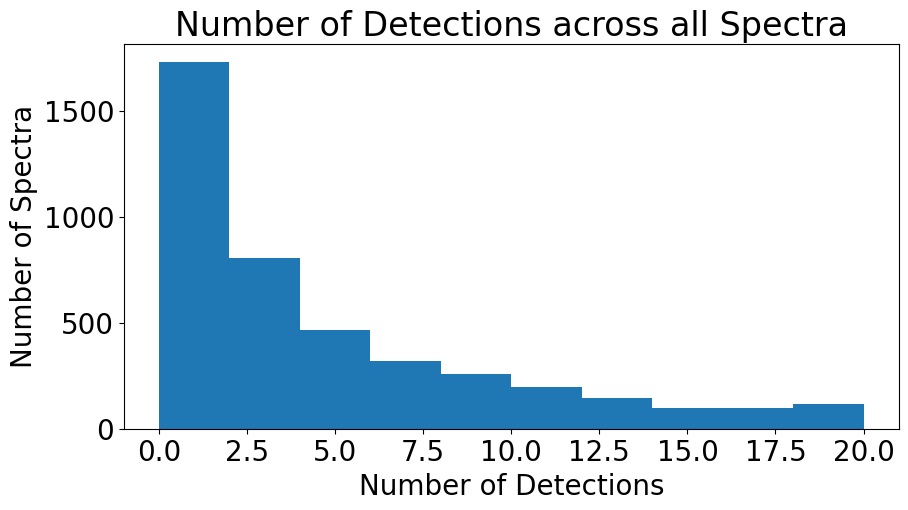

In [373]:
# plt.rcParams["figure.figsize"] = (18,12)
# plt.rcParams.update({'font.size': 50})
plt.hist(num_detections.tolist(), range=[0, 20])
plt.xlabel('Number of Detections')
plt.ylabel('Number of Spectra')
plt.title('Number of Detections across all Spectra')
plt.show()

In [374]:
# total number of detections
sum(num_detections)

245756

## Create a histogram of all the detections across all unique stars

In [375]:
aggregation_functions = {'ndetections': 'median'}
total_results_by_star = total_results.groupby(total_results['star']).aggregate(aggregation_functions)

In [327]:
stars = total_results_by_star.index.to_numpy()
print(len(stars))

852


In [253]:
np.savetxt('/mnt_home/zoek/code/APF-BL-DAP/Zoe/GAIA/stars.txt', stars, fmt='%s')
 
# Displaying the contents of the text file
# content = numpy.loadtxt('file1.txt')
# print("\nContent in file1.txt:\n", content)

In [254]:
print('there are ' + str(total_results_by_star.shape[0]) + ' unique stars')

there are 852 unique stars


In [255]:
num_detections_by_star = total_results_by_star['ndetections']

In [256]:
max_num_detections = max(num_detections_by_star)
print('max # of detections: ' + str(max_num_detections))

max # of detections: 723.0


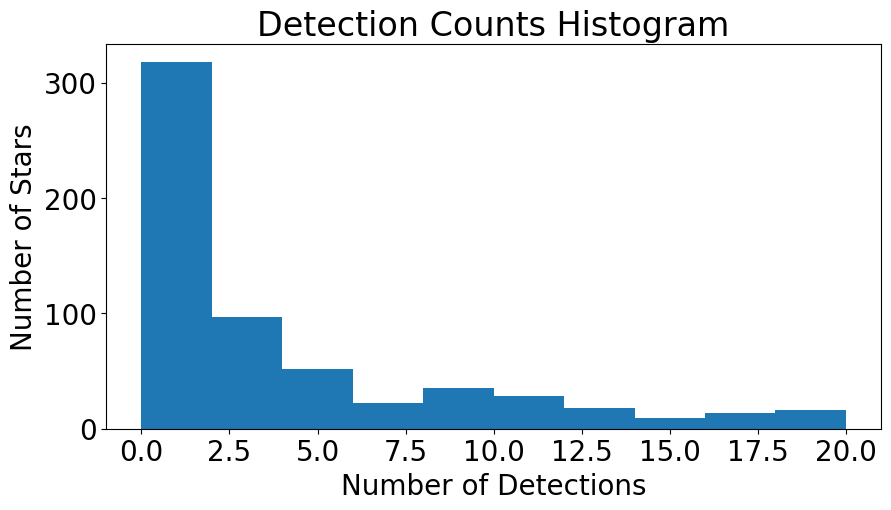

In [257]:
# plt.rcParams["figure.figsize"] = (10,5)
# plt.rcParams.update({'font.size': 20})
plt.hist(num_detections_by_star, range=[0, 20])
plt.xlabel('Number of Detections')
plt.ylabel('Number of Stars')
plt.title('Detection Counts Histogram')
plt.show()

## Find percentage of stars that have a certain # of detections

In [258]:
num_stars = total_results_by_star.shape[0]

In [259]:
zero_detections = total_results_by_star[total_results_by_star.ndetections < 0.5]
num_zero_detections = zero_detections.shape[0]

In [260]:
print(str(num_zero_detections * 100 / num_stars)  + '% of the stars have 0 detections' + ' (' + str(num_zero_detections) + ' stars)')

16.314553990610328% of the stars have 0 detections (139 stars)


In [261]:
less_than_10_detections = total_results_by_star[total_results_by_star.ndetections < 10]
num_less_than_10_detections = less_than_10_detections.shape[0]

In [262]:
print(str(num_less_than_10_detections * 100 / num_stars)  + '% of the stars have under 10 detections' + ' (' + str(num_less_than_10_detections) + ' stars)')

61.502347417840376% of the stars have under 10 detections (524 stars)


In [263]:
test = total_results[total_results.ndetections == 0]
test.shape

(1050, 3)

## Observe the relationship between SNR and number of detections

In [264]:
num_detections = total_results['ndetections'].to_numpy()
SNR = total_results['SNR'].to_numpy()

In [342]:
total_results

,star,ndetections
index,,
0,HIP12444,0
1,HIP19855,2
2,HIP12444,2
3,HIP12444,2
4,HIP42172,2
...,...,...
5863,HD172167,1
5864,Vega,0
5865,HD187642,4


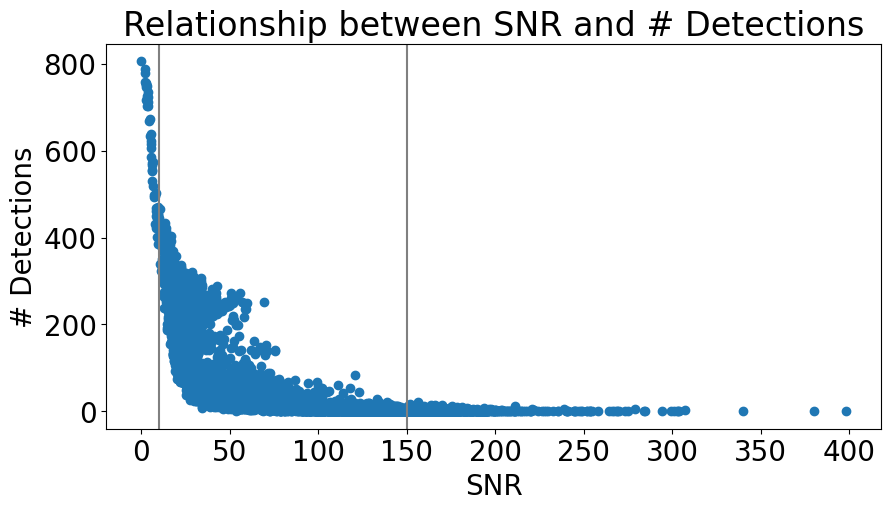

In [417]:
plt.scatter(SNR, num_detections)  # S/N 225 and above, 
plt.axvline(x=10, c='gray')
plt.axvline(x=150, c='gray')
# plt.axhline(y=20, c='gray')
# plt.ylim(-1, 20)
# plt.xlim(0, 40)
plt.xlabel('SNR')
plt.ylabel('# Detections')
plt.title('Relationship between SNR and # Detections')
plt.show()

In [400]:
all_s = []
for i in np.arange(len(SNR)):
    s = SNR[i]
    n = num_detections.tolist()[i]
    for j in np.arange(n):
        all_s = np.append(all_s, s)

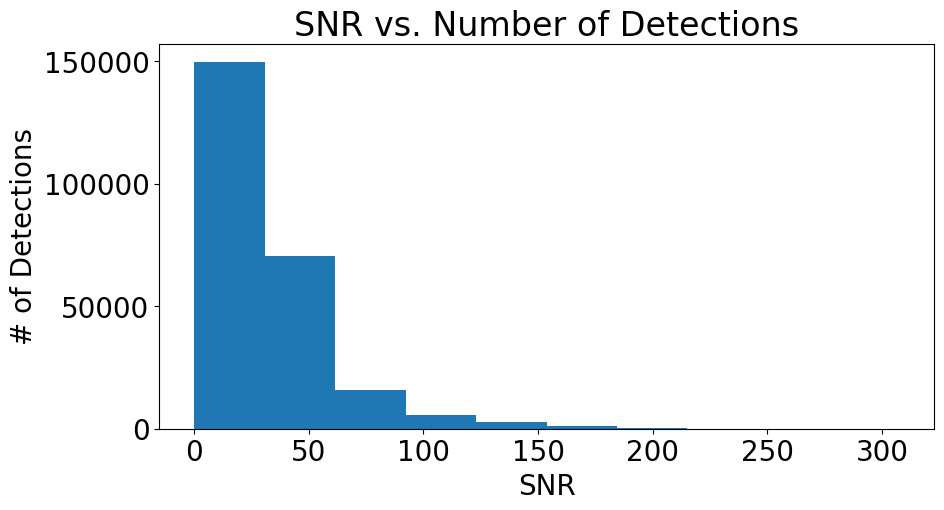

In [411]:
plt.hist(all_s)
plt.xlabel('SNR')
plt.ylabel('# of Detections')
plt.title('SNR vs. Number of Detections')
plt.show()

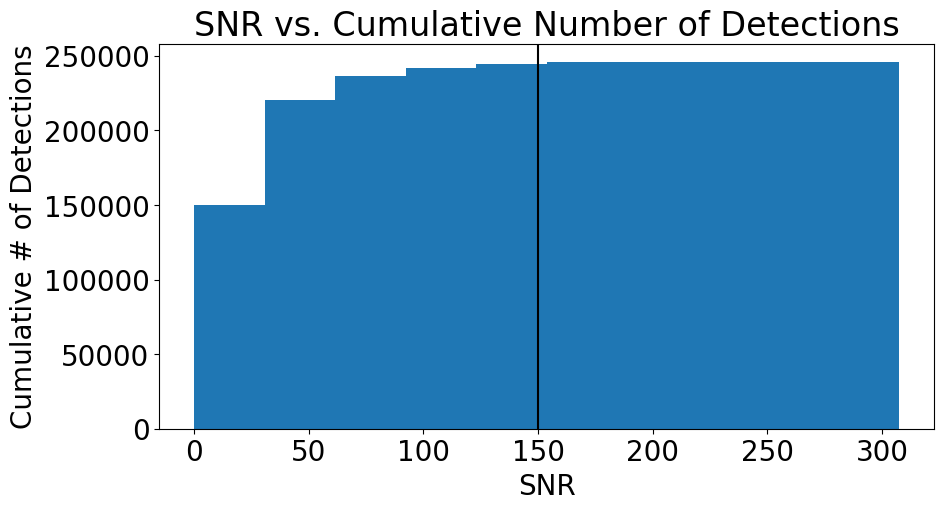

In [416]:
fig, ax = plt.subplots()

# plot the cumulative histogram
ax.hist(all_s, cumulative=True)
plt.axvline(x=150, color = 'black')
plt.xlabel('SNR')
plt.ylabel('Cumulative # of Detections')
plt.title('SNR vs. Cumulative Number of Detections')
plt.show()

## IGNORE BELOW

In [422]:
max_detections = total_results[total_results.SNR > 150]
max_detections
# max_detections.sort_values(by=['ndetections'], ascending=True)

,star,ndetections,SNR
index,,,
0,HIP12444,0,150.149579
1,HIP19855,2,162.887229
20,HIP77622,0,150.872526
23,HIP14576,0,161.751619
24,HIP21421,12,210.950923
...,...,...,...
5858,HD28355,0,181.209878
5859,HD28355,0,176.311487
5863,HD172167,1,273.203292


In [421]:
high_SNR = total_results[total_results.index == 415]
high_SNR.sort_values(by=['SNR'], ascending=False)

,star,ndetections,SNR
index,,,
415,HIP91262,0,398.131569


In [268]:
exposure_times = []

for file in list_of_files:
    
    file = fits.open(file)
    header = file[0].header
    exposure_time = header['EXPTIME']
    exposure_times = np.append(exposure_times, exposure_time)

#     print('File path: ' + APF_flux_path)
#     print('Star: ' + star)
#     print(exposure_time)
    
#     plt.figure()
#     plt.plot(wl, flux)
#     plt.ylim(0, 1.5)
#     plt.xlim(5880, 5920)
#     plt.show()
    
    # 14, 21, 24, 26, 27
    # 20, 28
    # weird 38



#     spect = flux

In [269]:
print(len(exposure_times))

5868


In [270]:
new1 = np.delete(exposure_times, 1762)

In [271]:
new2 = np.delete(new1, 1760)

In [272]:
final_exposure_times = new2.tolist()

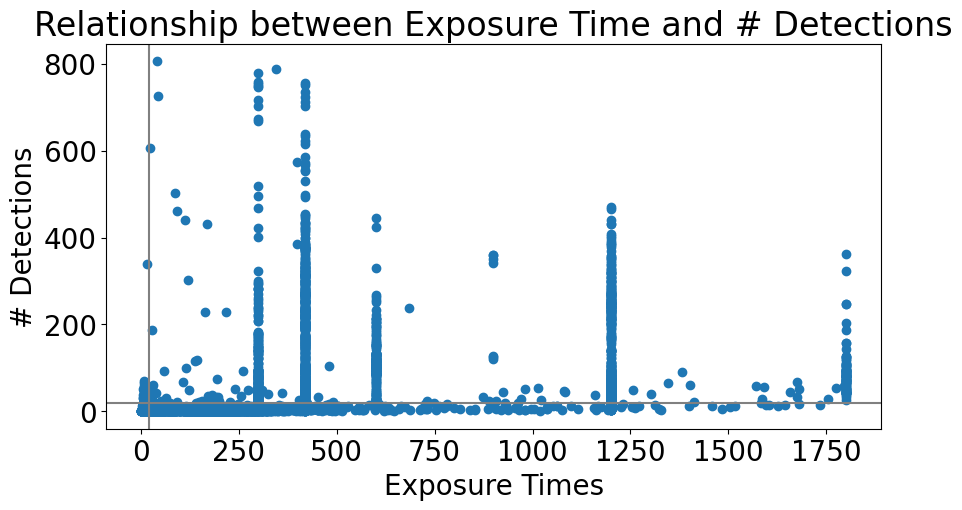

In [323]:
plt.scatter(final_exposure_times, num_detections)
plt.axvline(x=20, c='gray')
plt.axhline(y=20, c='gray')
# plt.ylim(1199, 1201)
plt.xlabel('Exposure Times')
plt.ylabel('# Detections')
plt.title('Relationship between Exposure Time and # Detections')
plt.show()